# Predicting Monetary Policy Changes using NLP

## Step 3: process economic data and start modelling

Goals of this notebook:
+ 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from tqdm import tqdm_notebook as tqdm

#For tokenizing sentences
import nltk
nltk.download('punkt')

#data_path = '/home/renatovassallo/Omega/BSE/Term2/Textmining/term_paper/Data'
data_path = '/home/vl/win/Term 2/Introduction of Text Mining and Natural Language Processing/Final project/Final presentation/Data'


[nltk_data] Downloading package punkt to /home/vl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load non-text dataset

### Peru

In [2]:
df_nontext_raw_peru = pd.read_csv(data_path+'/economic_data_peru.csv', header=1)
df_nontext_raw_peru = df_nontext_raw_peru.set_index(pd.to_datetime(df_nontext_raw_peru['date'], format="%Y-%m-%d")).drop(columns=['date'])
df_nontext_raw_peru['country'] = 1
print(df_nontext_raw_peru.shape)
df_nontext_raw_peru.head()

(254, 7)


rate  infl_exp  gdp        cpi    cpi_nfe      unem  country
date                                                                    
2002-01-01   NaN       2.3  NaN  56.313226  64.559454  9.028979        1
2002-02-01   NaN       2.3  NaN  56.291082  64.598649  9.306020        1
2002-03-01   NaN       2.3  NaN  56.594161  64.752513  9.544968        1
2002-04-01   NaN       2.3  NaN  57.006912  64.845443  9.808192        1
2002-05-01   NaN       2.4  NaN  57.086049  64.917164  9.695563        1

In [3]:
df_nontext_raw_peru.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2002-01-01 to 2023-02-01
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rate      234 non-null    float64
 1   infl_exp  253 non-null    float64
 2   gdp       240 non-null    float64
 3   cpi       253 non-null    float64
 4   cpi_nfe   253 non-null    float64
 5   unem      252 non-null    float64
 6   country   254 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 15.9 KB


### Chile

In [4]:
df_nontext_raw_chile = pd.read_csv(data_path+'/economic_data_chile.csv', header=1)
df_nontext_raw_chile = df_nontext_raw_chile.set_index(pd.to_datetime(df_nontext_raw_chile['date'])).drop(columns=['date'])
df_nontext_raw_chile['country'] = 2
print(df_nontext_raw_chile.shape)
df_nontext_raw_chile.head()

(254, 6)


rate  infl_exp        gdp        cpi      unem  country
date                                                                   
2002-01-01  6.159091       3.2  53.114593  59.452180  8.783655        2
2002-02-01  5.825000       3.1  52.787448  59.452180  9.103609        2
2002-03-01  5.050000       3.0  52.854612  59.749441  9.601496        2
2002-04-01  4.750000       3.1  53.485075  59.988439  9.631666        2
2002-05-01  4.225000       3.0  53.103828  60.048427  9.932012        2

In [5]:
df_nontext_raw_chile.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2002-01-01 to 2023-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rate      254 non-null    float64
 1   infl_exp  254 non-null    float64
 2   gdp       252 non-null    float64
 3   cpi       253 non-null    float64
 4   unem      252 non-null    float64
 5   country   254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


### Australia

In [6]:
df_nontext_raw_aus = pd.read_csv(data_path+'/economic_data_aus.csv', header=1)
df_nontext_raw_aus = df_nontext_raw_aus.set_index(pd.to_datetime(df_nontext_raw_aus['date'])).drop(columns=['date'])
df_nontext_raw_aus['country']= 3
print(df_nontext_raw_aus.shape)
df_nontext_raw_aus.head()

(182, 9)


rate  infl_exp    gdp_index  gdp_growth        cpi  cpi_nfe_perc  \
date                                                                           
2008-01-01  7.00  2.850000  378522.0000         NaN  83.956350      0.818527   
2008-02-01  7.00  2.850000  378886.6667    0.001927  84.327838      1.022757   
2008-03-01  7.25  2.850000  379251.3333    0.001925  84.699327      1.226987   
2008-04-01  7.25  2.850000  379616.0000    0.003374  85.070815      1.431217   
2008-05-01  7.25  2.983333  380531.0000    0.004821  85.380389      1.282350   

                unem        gdp  country  
date                                      
2008-01-01  4.220095  50.000000        3  
2008-02-01  3.979727  50.048170        3  
2008-03-01  4.056833  50.096340        3  
2008-04-01  4.265198  50.144509        3  
2008-05-01  4.265345  50.265374        3

In [7]:
df_nontext_raw_aus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 182 entries, 2008-01-01 to 2023-02-01
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rate          182 non-null    float64
 1   infl_exp      180 non-null    float64
 2   gdp_index     178 non-null    float64
 3   gdp_growth    181 non-null    float64
 4   cpi           180 non-null    float64
 5   cpi_nfe_perc  180 non-null    float64
 6   unem          180 non-null    float64
 7   gdp           178 non-null    float64
 8   country       182 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 14.2 KB


## Economic analysis

#### Peru

Text(0.5, 1.0, 'Unemployement rate over the years')

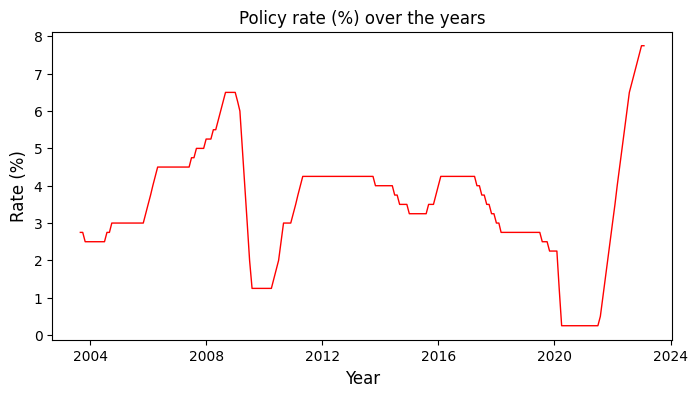

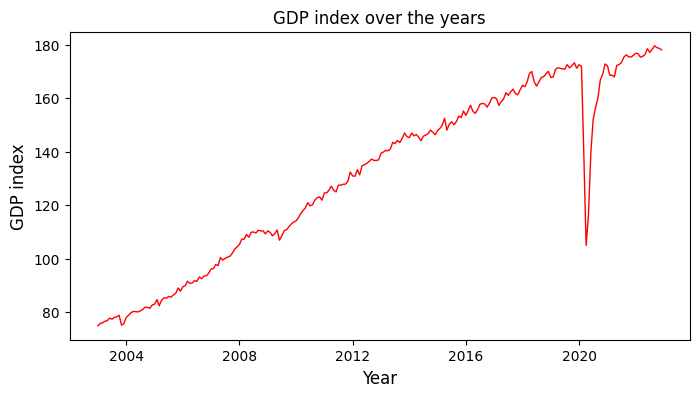

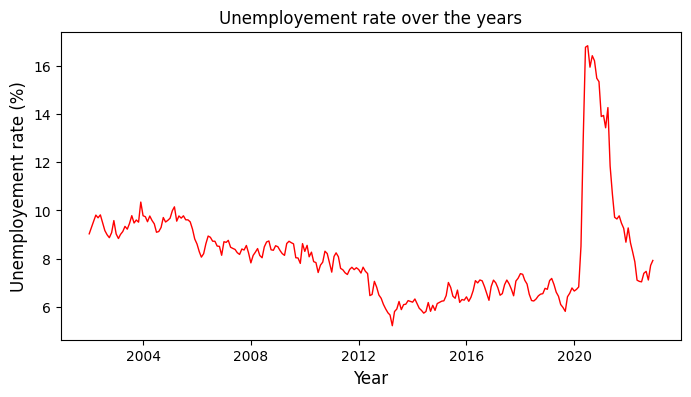

In [8]:
fig1, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_peru.index, df_nontext_raw_peru['rate'].values, c = 'red', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Rate (%)',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='Policy rate (%) over the years')

fig2, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_peru.index, df_nontext_raw_peru['gdp'].values, c = 'red', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('GDP index',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='GDP index over the years')

fig3, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_peru.index, df_nontext_raw_peru['unem'].values, c = 'red', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Unemployement rate (%)',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='Unemployement rate over the years')

#### Chile

Text(0.5, 1.0, 'Unemployement rate over the years')

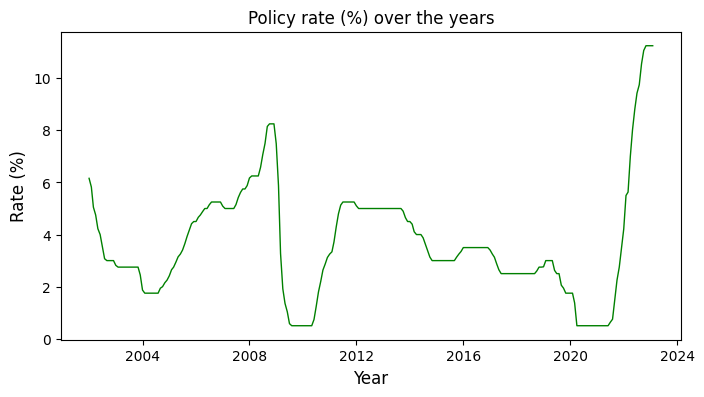

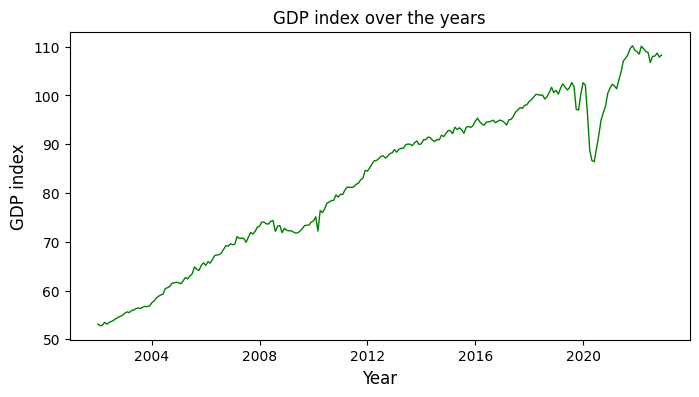

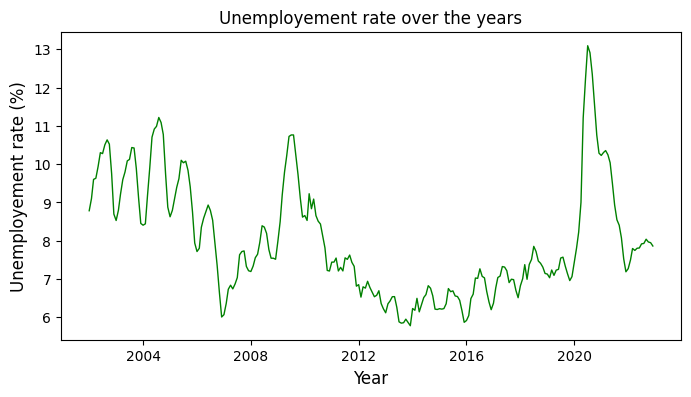

In [9]:
fig1, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_chile.index, df_nontext_raw_chile['rate'].values, c = 'green', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Rate (%)',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='Policy rate (%) over the years')

fig2, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_chile.index, df_nontext_raw_chile['gdp'].values, c = 'green', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('GDP index',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='GDP index over the years')

fig3, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_chile.index, df_nontext_raw_chile['unem'].values, c = 'green', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Unemployement rate (%)',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='Unemployement rate over the years')

#### Australia

Text(0.5, 1.0, 'Unemployement rate over the years')

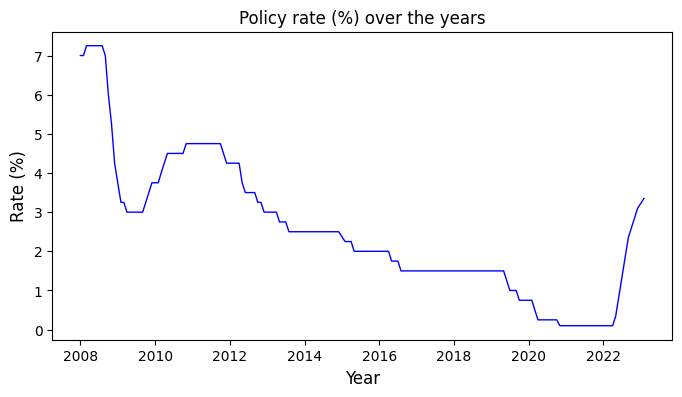

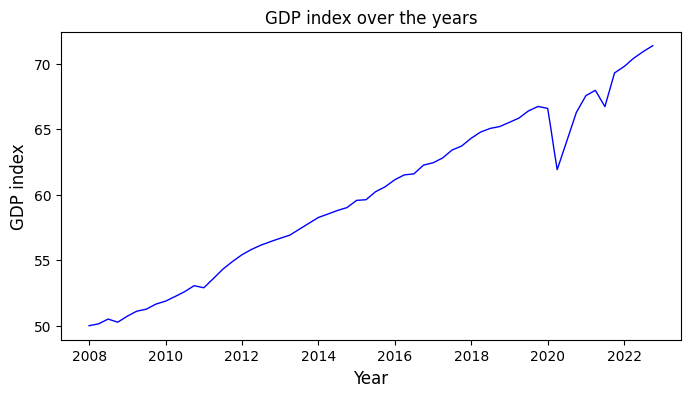

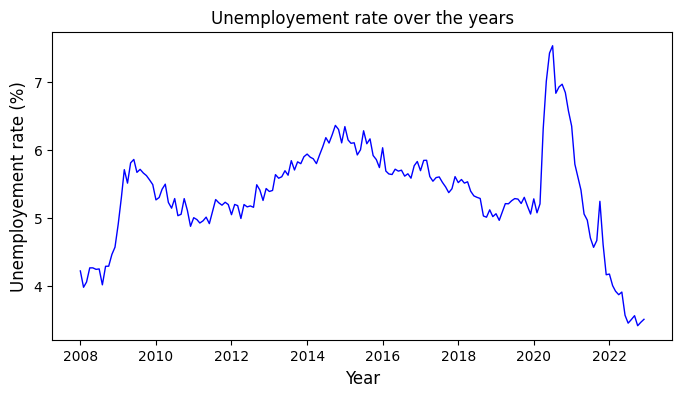

In [10]:
fig1, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_aus.index, df_nontext_raw_aus['rate'].values, c = 'blue', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Rate (%)',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='Policy rate (%) over the years')

fig2, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_aus.index, df_nontext_raw_aus['gdp'].values, c = 'blue', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('GDP index',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='GDP index over the years')

fig3, ax = plt.subplots(figsize=(8,4))
ax.plot(df_nontext_raw_aus.index, df_nontext_raw_aus['unem'].values, c = 'blue', linewidth= 1.0)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Unemployement rate (%)',fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title(label='Unemployement rate over the years')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Unemployement rate (%)')

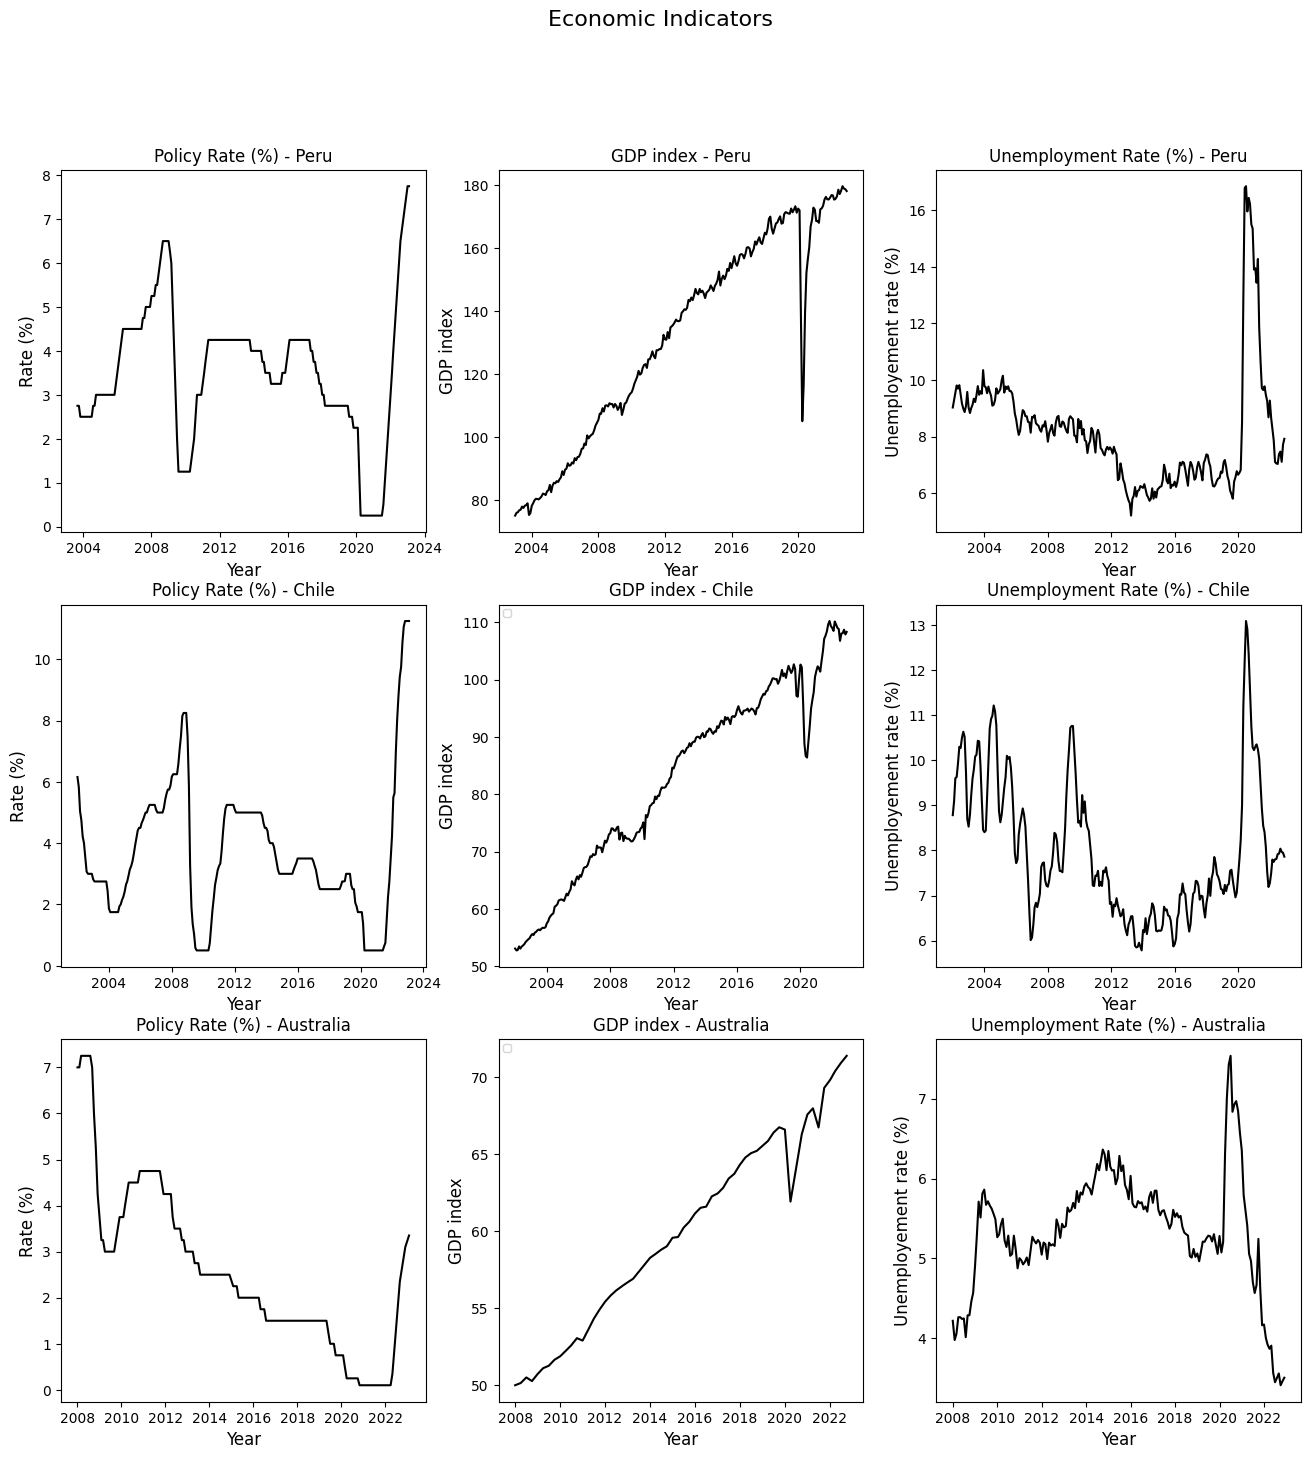

In [11]:
#Resume

fig, axes = plt.subplots(3,3,figsize=(16,16))

sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['rate'].values, color = "black",ax=axes[0][0],legend='auto')
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['gdp'].values, color = "black",ax=axes[0][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['unem'].values, color = "black",ax=axes[0][2])

sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['rate'].values, color = "black",ax=axes[1][0])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['gdp'].values, color = "black",ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['unem'].values,color = "black", ax=axes[1][2])


sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['rate'].values, color = "black",ax=axes[2][0])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['gdp'].values, color = "black",ax=axes[2][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['unem'].values,color = "black", ax=axes[2][2])

fig.suptitle('Economic Indicators',fontsize=16)


for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].set_xlabel("")
        if (i > 0) and (j == 1):
            axes[i][j].legend(loc='upper left', fontsize='7')

#Peru
axes[0][0].set_title('Policy Rate (%) - Peru')
axes[0][0].set_xlabel('Year',fontsize=12)
axes[0][0].set_ylabel('Rate (%)',fontsize=12)
axes[0][1].set_title('GDP index - Peru')
axes[0][1].set_xlabel('Year',fontsize=12)
axes[0][1].set_ylabel('GDP index',fontsize=12)
axes[0][2].set_title('Unemployment Rate (%) - Peru')
axes[0][2].set_xlabel('Year',fontsize=12)
axes[0][2].set_ylabel('Unemployement rate (%)',fontsize=12)
#Chile
axes[1][0].set_title('Policy Rate (%) - Chile')
axes[1][0].set_xlabel('Year',fontsize=12)
axes[1][0].set_ylabel('Rate (%)',fontsize=12)
axes[1][1].set_title('GDP index - Chile')
axes[1][1].set_xlabel('Year',fontsize=12)
axes[1][1].set_ylabel('GDP index',fontsize=12)
axes[1][2].set_title('Unemployment Rate (%) - Chile')
axes[1][2].set_xlabel('Year',fontsize=12)
axes[1][2].set_ylabel('Unemployement rate (%)',fontsize=12)
#Australia
axes[2][0].set_title('Policy Rate (%) - Australia')
axes[2][0].set_xlabel('Year',fontsize=12)
axes[2][0].set_ylabel('Rate (%)',fontsize=12)
axes[2][1].set_title('GDP index - Australia')
axes[2][1].set_xlabel('Year',fontsize=12)
axes[2][1].set_ylabel('GDP index',fontsize=12)
axes[2][2].set_title('Unemployment Rate (%) - Australia')
axes[2][2].set_xlabel('Year',fontsize=12)
axes[2][2].set_ylabel('Unemployement rate (%)',fontsize=12)



## Data processing


### Peru

#### Add decisions

In [12]:
df_nontext_raw_peru['target'] = np.NaN

for i in range(len(df_nontext_raw_peru)):
    if df_nontext_raw_peru['rate'][i] != np.NaN:
        try:
            rate_diff = df_nontext_raw_peru['rate'][i+1] - df_nontext_raw_peru['rate'][i]
            if rate_diff > 0:
                df_nontext_raw_peru['target'][i] = 1
            elif rate_diff == 0:
                df_nontext_raw_peru['target'][i] = 0
            elif rate_diff < 0:
                df_nontext_raw_peru['target'][i] = -1
            #else:
            #    df_nontext_raw['target'][i] = 0
        except Exception:
            df_nontext_raw_peru['target'][i] = np.NaN
    else:
        df_nontext_raw_peru['target'][i] = np.NaN

df_nontext_raw_peru.head(50)

/tmp/ipykernel_795/3248929411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_peru['target'][i] = 0
/tmp/ipykernel_795/3248929411.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_peru['target'][i] = -1
/tmp/ipykernel_795/3248929411.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_peru['target'][i] = 1
/tmp/ipykernel_795/3248929411.py:16: SettingWithCopyWarning: 
A value is trying

rate  infl_exp        gdp        cpi    cpi_nfe       unem  \
date                                                                     
2002-01-01   NaN       2.3        NaN  56.313226  64.559454   9.028979   
2002-02-01   NaN       2.3        NaN  56.291082  64.598649   9.306020   
2002-03-01   NaN       2.3        NaN  56.594161  64.752513   9.544968   
2002-04-01   NaN       2.3        NaN  57.006912  64.845443   9.808192   
2002-05-01   NaN       2.4        NaN  57.086049  64.917164   9.695563   
2002-06-01   NaN       2.4        NaN  56.956304  64.961557   9.817742   
2002-07-01   NaN       2.4        NaN  56.975845  65.124668   9.495592   
2002-08-01   NaN       2.4        NaN  57.033330  65.206654   9.164765   
2002-09-01   NaN       2.2        NaN  57.303414  65.205570   8.987405   
2002-10-01   NaN       2.2        NaN  57.714831  65.241583   8.868712   
2002-11-01   NaN       2.4        NaN  57.484334  65.268749   9.080851   
2002-12-01   NaN       2.2        NaN  57.465625  65.249944   9.579806   
2003-01-01   NaN       2.3  74.997752  57.598612  65.177038   9.025746   
2003-02-01   NaN       2.3  75.879351  57.868648  65.325737   8.833732   
2003-03-01   NaN       2.5  76.066410  58.515493  66.591954   9.003582   
2003-04-01   NaN       2.5  76.688140  58.485733  66.767796   9.124858   
2003-05-01   NaN       2.5  76.860589  58.467003  66.804922   9.339384   
2003-06-01   NaN       2.5  77.851425  58.190379  66.834999   9.223184   
2003-07-01   NaN       2.5  77.416037  58.103549  66.961579   9.458699   
2003-08-01   NaN       2.3  78.129910  58.111367  67.013493   9.784115   
2003-09-01  2.75       2.2  78.347351  58.435976  67.001996   9.478390   
2003-10-01  2.75       2.2  78.908142  58.464629  66.954659   9.604441   
2003-11-01  2.50       2.2  75.209304  58.562665  66.958668   9.514350   
2003-12-01  2.50       2.1  75.752133  58.892929  67.113857  10.350103   
2004-01-01  2.50       2.5  78.091980  59.209448  67.018916   9.782165   
2004-02-01  2.50       2.5  78.939324  59.852513  67.120083   9.740684   
2004-03-01  2.50       2.5  79.857177  60.128103  67.298373   9.533144   
2004-04-01  2.50       2.5  80.332059  60.114412  67.224992   9.769430   
2004-05-01  2.50       2.5  80.277225  60.327123  67.256507   9.585610   
2004-06-01  2.50       2.5  80.142937  60.667252  67.235794   9.444387   
2004-07-01  2.50       2.7  80.552120  60.784405  67.298134   9.094294   
2004-08-01  2.75       2.8  81.067296  60.778606  67.336563   9.126106   
2004-09-01  2.75       2.7  81.977566  60.788750  67.313654   9.294116   
2004-10-01  3.00       2.8  81.847518  60.774314  67.499898   9.706737   
2004-11-01  3.00       2.7  81.527169  60.948742  67.740126   9.521042   
2004-12-01  3.00       2.7  82.722797  60.943040  67.844874   9.588435   
2005-01-01  3.00       2.7  83.076186  61.004074  67.807647   9.678271   
2005-02-01  3.00       2.8  84.744379  60.860946  67.780635   9.992539   
2005-03-01  3.00       2.7  82.438317  61.256661  68.057712  10.151798   
2005-04-01  3.00       2.7  84.537969  61.329449  68.032712   9.556534   
2005-05-01  3.00       2.7  85.404729  61.406927  68.154046   9.772906   
2005-06-01  3.00       2.7  85.286357  61.568883  68.063526   9.681855   
2005-07-01  3.00       2.7  85.944411  61.633291  68.210653   9.778131   
2005-08-01  3.00       2.7  85.679120  61.522594  68.238973   9.612051   
2005-09-01  3.00       2.5  86.524571  61.464591  68.257875   9.609423   
2005-10-01  3.00       2.4  87.123429  61.553580  68.372178   9.525371   
2005-11-01  3.00       2.3  89.087553  61.595464  68.571530   9.223025   
2005-12-01  3.25       2.3  87.912113  61.853687  68.769859   8.816541   
2006-01-01  3.50       2.3  89.605727  62.162714  68.755606   8.605525   
2006-02-01  3.75       2.3  89.948124  62.503538  68.750745   8.283213   

            country  target  
date                         
2002-01-01        1     NaN  
2002-02-01        1     NaN  
2002-03-01        1     NaN  
2002-04-01   

In [13]:
# Add difference from previous value
df_nontext_raw_peru['prev_decision'] = df_nontext_raw_peru['target'].shift(1)
df_nontext_raw_peru['next_decision'] = df_nontext_raw_peru['target'].shift(-1)
df_nontext_raw_peru['rate_diff'] = df_nontext_raw_peru['rate'].diff()
df_nontext_raw_peru['infl_exp_diff'] = df_nontext_raw_peru['infl_exp'].diff()
df_nontext_raw_peru['gdp_diff_prev'] = df_nontext_raw_peru['gdp'].diff() / df_nontext_raw_peru['gdp'].shift(1) * 100
df_nontext_raw_peru['gdp_diff_year'] = df_nontext_raw_peru['gdp'].diff(periods=12) / df_nontext_raw_peru['gdp'].shift(12) * 100
df_nontext_raw_peru['cpi_diff_prev'] = df_nontext_raw_peru['cpi'].diff() / df_nontext_raw_peru['cpi'].shift(1) * 100
df_nontext_raw_peru['cpi_diff_year'] = df_nontext_raw_peru['cpi'].diff(periods=12) / df_nontext_raw_peru['cpi'].shift(12) * 100
df_nontext_raw_peru['cpi_nfe_diff_prev'] = df_nontext_raw_peru['cpi_nfe'].diff() / df_nontext_raw_peru['cpi_nfe'].shift(1) * 100
df_nontext_raw_peru['cpi_nfe_diff_year'] = df_nontext_raw_peru['cpi_nfe'].diff(periods=12) / df_nontext_raw_peru['cpi_nfe'].shift(12) * 100
df_nontext_raw_peru['unem_diff_prev'] = df_nontext_raw_peru['unem'].diff()
df_nontext_raw_peru['unem_diff_year'] = df_nontext_raw_peru['unem'].diff(periods=12)

# Move columns to front of df
cols_to_move = ['target', 'prev_decision','next_decision','country']
df_nontext_raw_peru = df_nontext_raw_peru[ cols_to_move + [col for col in df_nontext_raw_peru.columns if col not in cols_to_move] ]
df_nontext_raw_peru

target  prev_decision  next_decision  country  rate  infl_exp  \
date                                                                        
2002-01-01     NaN            NaN            NaN        1   NaN       2.3   
2002-02-01     NaN            NaN            NaN        1   NaN       2.3   
2002-03-01     NaN            NaN            NaN        1   NaN       2.3   
2002-04-01     NaN            NaN            NaN        1   NaN       2.3   
2002-05-01     NaN            NaN            NaN        1   NaN       2.4   
...            ...            ...            ...      ...   ...       ...   
2022-10-01     1.0            1.0            1.0        1  7.00       4.5   
2022-11-01     1.0            1.0            1.0        1  7.25       4.4   
2022-12-01     1.0            1.0            0.0        1  7.50       4.4   
2023-01-01     0.0            1.0            NaN        1  7.75       3.7   
2023-02-01     NaN            0.0            NaN        1  7.75       NaN   

                   gdp         cpi     cpi_nfe      unem  rate_diff  \
date                                                                  
2002-01-01         NaN   56.313226   64.559454  9.028979        NaN   
2002-02-01         NaN   56.291082   64.598649  9.306020        NaN   
2002-03-01         NaN   56.594161   64.752513  9.544968        NaN   
2002-04-01         NaN   57.006912   64.845443  9.808192        NaN   
2002-05-01         NaN   57.086049   64.917164  9.695563        NaN   
...                ...         ...         ...       ...        ...   
2022-10-01  178.938606  107.050724  104.777902  7.109187       0.25   
2022-11-01  178.697862  107.604861  105.015735  7.716332       0.25   
2022-12-01  178.116723  108.459162  105.586000  7.921931       0.25   
2023-01-01         NaN  108.704764  105.636971       NaN       0.25   
2023-02-01         NaN         NaN         NaN       NaN       0.00   

            infl_exp_diff  gdp_diff_prev  gdp_diff_year  cpi_diff_prev  \
date                                                                     
2002-01-01            NaN            NaN            NaN            NaN   
2002-02-01            0.0            NaN            NaN      -0.039322   
2002-03-01            0.0            NaN            NaN       0.538413   
2002-04-01            0.0            NaN            NaN       0.729318   
2002-05-01            0.1            NaN            NaN       0.138820   
...                   ...            ...            ...            ...   
2022-10-01            0.3      -0.402213       1.954333       0.347652   
2022-11-01           -0.1      -0.134540       1.861062       0.517640   
2022-12-01            0.0      -0.325207       1.203029       0.793924   
2023-01-01           -0.7            NaN            NaN       0.226447   
2023-02-01            NaN            NaN            NaN            NaN   

            cpi_diff_year  cpi_nfe_diff_prev  cpi_nfe_diff_year  \
date                                                              
2002-01-01            NaN                NaN                NaN   
2002-02-01            NaN           0.060713                NaN   
2002-03-01            NaN           0.238184                NaN   
2002-04-01            NaN           0.143515                NaN   
2002-05-01            NaN           0.110603                NaN   
...                   ...                ...                ...   
2022-10-01       8.275195           0.497761           5.718150   
2022-11-01       8.447230           0.226987           5.711120   
2022-12-01       8.459162           0.543028           5.586000   
2023-01-01       8.664267           0.048275           5.801785   
2023-02-01            NaN                NaN                NaN   

            unem_diff_prev  unem_diff_year  
date                                        
2002-01-01             NaN             NaN  
2002-02-01        0.277041             NaN  
2002-03-01        0.238948             NaN  
2002-04-01        0.263224

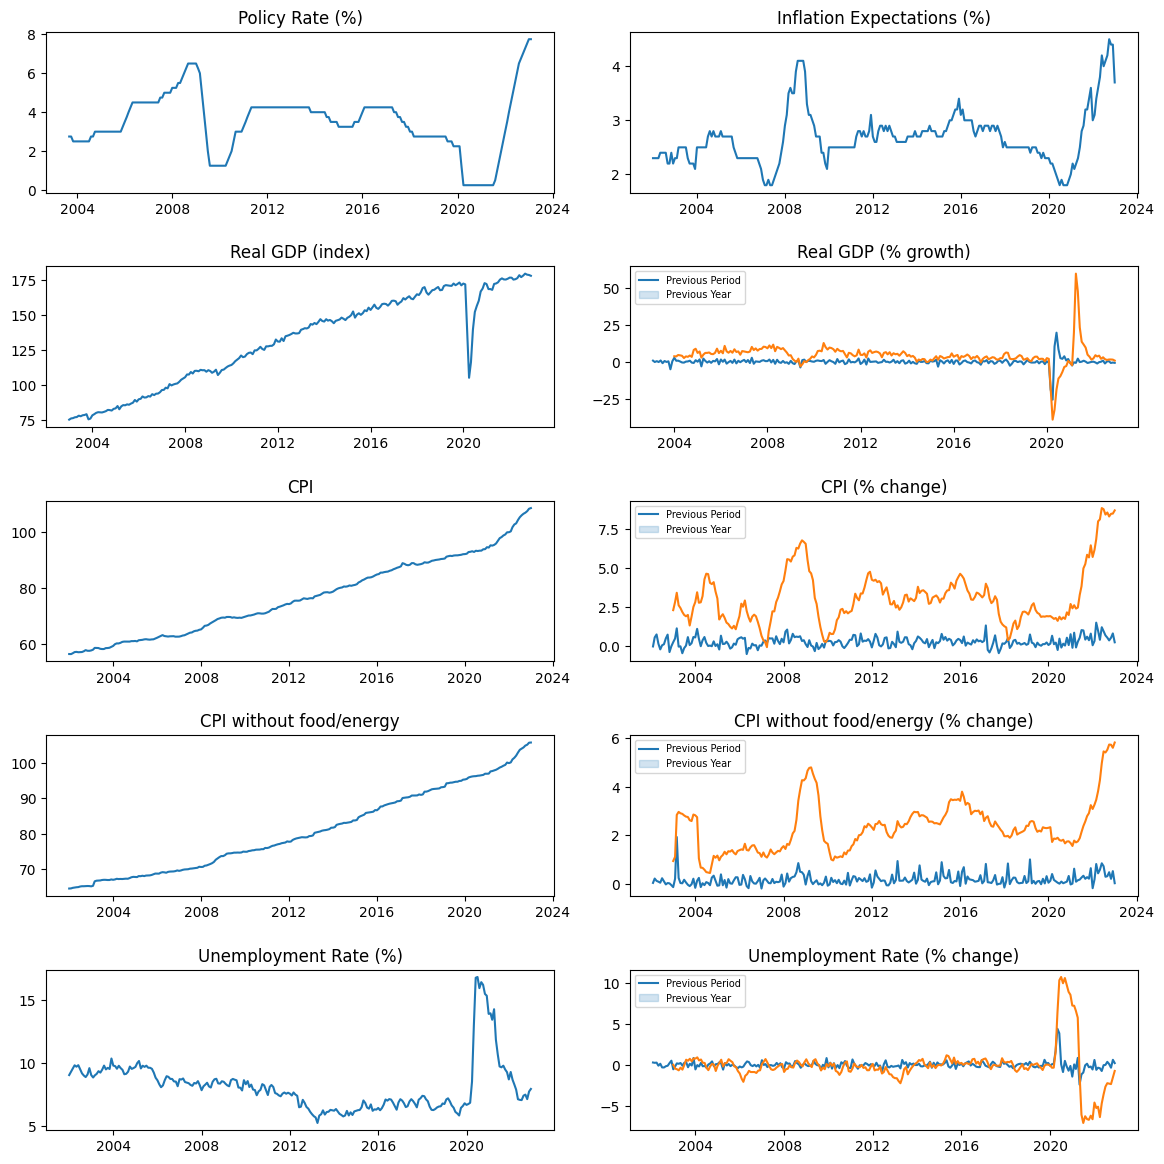

In [14]:
fig, axes = plt.subplots(5,2,figsize=(12,12))
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['rate'].values, ax=axes[0][0])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['infl_exp'].values, ax=axes[0][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['gdp'].values, ax=axes[1][0])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['gdp_diff_prev'].values, ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['gdp_diff_year'].values, ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['cpi'].values, ax=axes[2][0])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['cpi_diff_prev'].values, ax=axes[2][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['cpi_diff_year'].values, ax=axes[2][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['cpi_nfe'].values, ax=axes[3][0])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['cpi_nfe_diff_prev'].values, ax=axes[3][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['cpi_nfe_diff_year'].values, ax=axes[3][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['unem'].values, ax=axes[4][0])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['unem_diff_prev'].values, ax=axes[4][1])
sns.lineplot(x=df_nontext_raw_peru.index, y=df_nontext_raw_peru['unem_diff_year'].values, ax=axes[4][1])

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].set_xlabel("")
        if (i > 0) and (j == 1):
            axes[i][j].legend(loc='upper left', fontsize='7', labels=['Previous Period', 'Previous Year'])

axes[0][0].set_title('Policy Rate (%)')
axes[0][1].set_title('Inflation Expectations (%)')
axes[1][0].set_title('Real GDP (index)')
axes[1][1].set_title('Real GDP (% growth)')
axes[2][0].set_title('CPI')
axes[2][1].set_title('CPI (% change)')
axes[3][0].set_title('CPI without food/energy')
axes[3][1].set_title('CPI without food/energy (% change)')
axes[4][0].set_title('Unemployment Rate (%)')
axes[4][1].set_title('Unemployment Rate (% change)')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.tight_layout(pad=2.0)
plt.show()


#### Correlation analysis

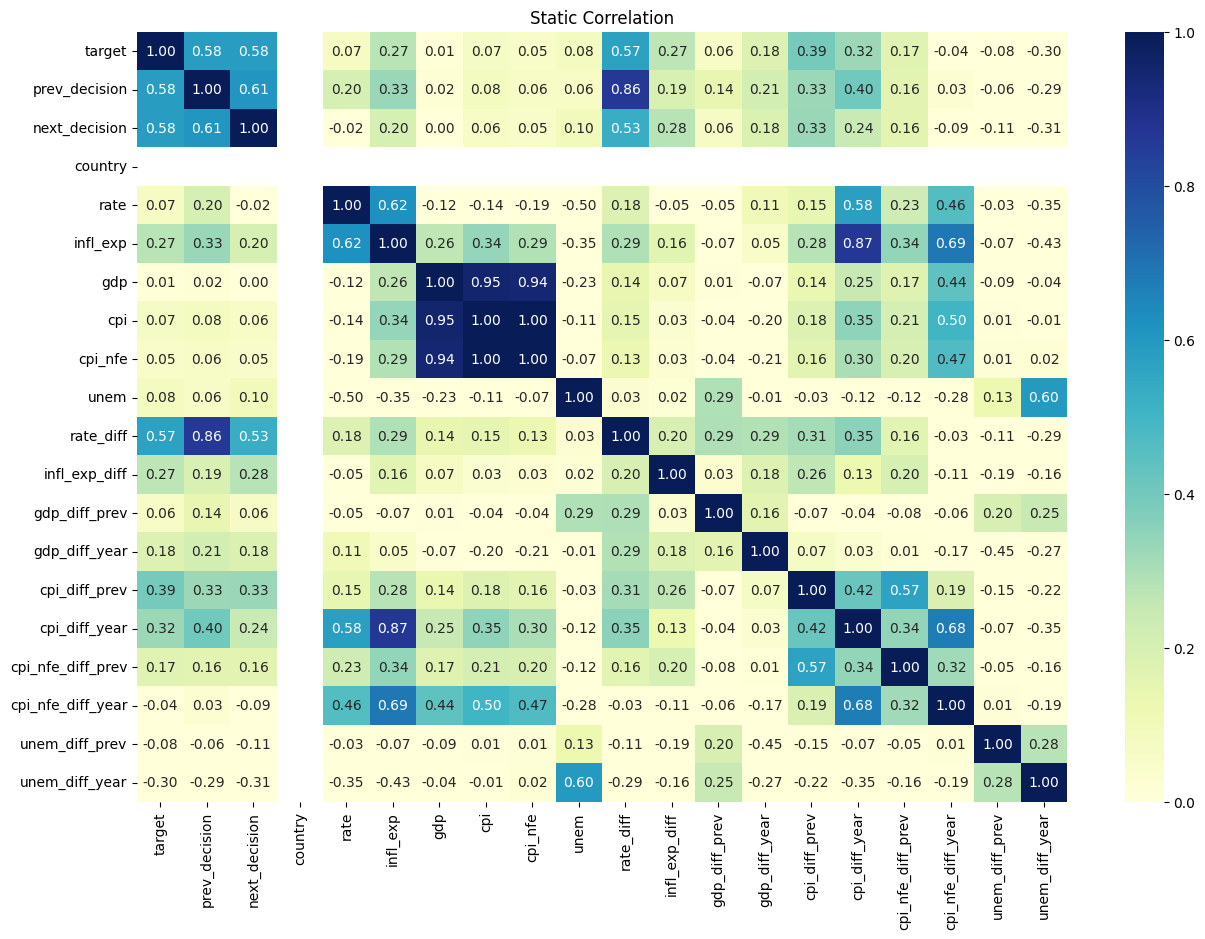

In [15]:
#df_nontext_raw_peru = df_nontext_raw_peru.drop('country')
#df_nontext_raw_peru=df_nontext_raw_peru.drop(['country'], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df_nontext_raw_peru[df_nontext_raw_peru.columns.values].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Static Correlation")
plt.show()

Higher correlation with the target (Rate Decision):

+ 'rate_diff'
+ 'prev_decision'
+ 'cpi_diff_year'
+ 'infl_exp'
+ 'unem_diff_year'
+ 'gdp_diff_year'

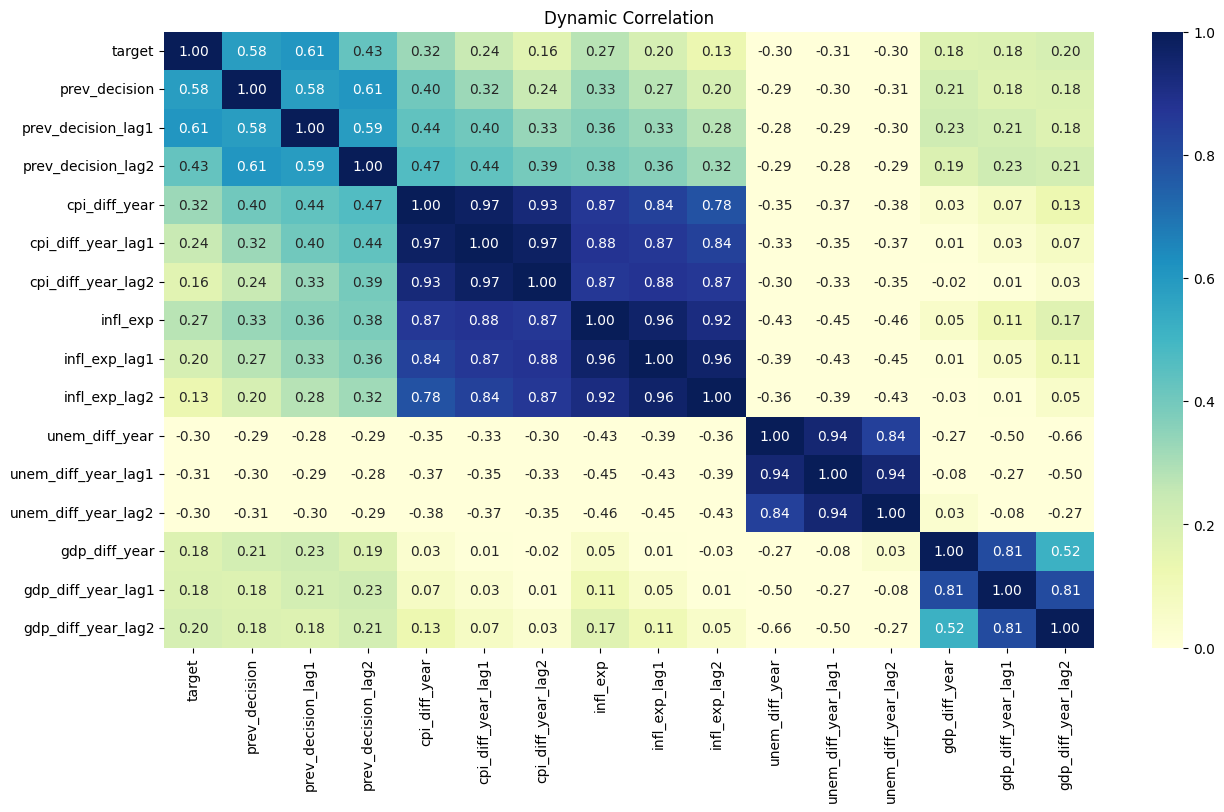

In [16]:
# Adding some lags
df_nontext_raw_peru['prev_decision_lag1'] = df_nontext_raw_peru['prev_decision'].shift(1)
df_nontext_raw_peru['prev_decision_lag2'] = df_nontext_raw_peru['prev_decision'].shift(2)
df_nontext_raw_peru['cpi_diff_year_lag1'] = df_nontext_raw_peru['cpi_diff_year'].shift(1)
df_nontext_raw_peru['cpi_diff_year_lag2'] = df_nontext_raw_peru['cpi_diff_year'].shift(2)
df_nontext_raw_peru['infl_exp_lag1'] = df_nontext_raw_peru['infl_exp'].shift(1)
df_nontext_raw_peru['infl_exp_lag2'] = df_nontext_raw_peru['infl_exp'].shift(2)
df_nontext_raw_peru['unem_diff_year_lag1'] = df_nontext_raw_peru['unem_diff_year'].shift(1)
df_nontext_raw_peru['unem_diff_year_lag2'] = df_nontext_raw_peru['unem_diff_year'].shift(2)
df_nontext_raw_peru['gdp_diff_year_lag1'] = df_nontext_raw_peru['gdp_diff_year'].shift(1)
df_nontext_raw_peru['gdp_diff_year_lag2'] = df_nontext_raw_peru['gdp_diff_year'].shift(2)

# Dynamic correlations
lag_corr_columns = ['target','prev_decision','prev_decision_lag1','prev_decision_lag2',
                    'cpi_diff_year','cpi_diff_year_lag1','cpi_diff_year_lag2',
                    'infl_exp','infl_exp_lag1','infl_exp_lag2',
                    'unem_diff_year','unem_diff_year_lag1','unem_diff_year_lag2',
                    'gdp_diff_year', 'gdp_diff_year_lag1', 'gdp_diff_year_lag2']
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.heatmap(df_nontext_raw_peru[df_nontext_raw_peru[lag_corr_columns].columns.values].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Dynamic Correlation")
plt.show()

Improvements:

+ 'prev_decision_lag1'
+ 'unem_diff_year_lag2'

In [17]:
# Keep main variables
selected_features = ['rate','target','prev_decision','next_decision','cpi_diff_year','infl_exp','unem_diff_year','gdp_diff_year','country']
df_nontext_peru = df_nontext_raw_peru[selected_features]
df_nontext_peru.dropna(inplace=True)
df_nontext_peru

/tmp/ipykernel_795/216778464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_peru.dropna(inplace=True)


rate  target  prev_decision  next_decision  cpi_diff_year  \
date                                                                    
2004-01-01  2.50     0.0            0.0            0.0       2.796658   
2004-02-01  2.50     0.0            0.0            0.0       3.428220   
2004-03-01  2.50     0.0            0.0            0.0       2.755869   
2004-04-01  2.50     0.0            0.0            0.0       2.784744   
2004-05-01  2.50     0.0            0.0            0.0       3.181487   
...          ...     ...            ...            ...            ...   
2022-08-01  6.50     1.0            1.0            1.0       8.397988   
2022-09-01  6.75     1.0            1.0            1.0       8.529853   
2022-10-01  7.00     1.0            1.0            1.0       8.275195   
2022-11-01  7.25     1.0            1.0            1.0       8.447230   
2022-12-01  7.50     1.0            1.0            0.0       8.459162   

            infl_exp  unem_diff_year  gdp_diff_year  country  
date                                                          
2004-01-01       2.5        0.756419       4.125761        1  
2004-02-01       2.5        0.906953       4.032682        1  
2004-03-01       2.5        0.529562       4.983496        1  
2004-04-01       2.5        0.644572       4.751607        1  
2004-05-01       2.5        0.246226       4.445237        1  
...              ...             ...            ...      ...  
2022-08-01       4.1       -2.259025       1.627833        1  
2022-09-01       4.2       -2.309613       1.930168        1  
2022-10-01       4.5       -2.368312       1.954333        1  
2022-11-01       4.4       -1.542219       1.861062        1  
2022-12-01       4.4       -0.759638       1.203029        1  

[228 rows x 9 columns]

In [18]:
#df_nontext_peru.to_csv(data_path+'/nontext_data_peru_final.csv',index_label=False)

### Chile


#### Add decisions

In [19]:
df_nontext_raw_chile['target'] = np.NaN

for i in range(len(df_nontext_raw_chile)):
    if df_nontext_raw_chile['rate'][i] != np.NaN:
        try:
            rate_diff = df_nontext_raw_chile['rate'][i+1] - df_nontext_raw_chile['rate'][i]
            if rate_diff > 0:
                df_nontext_raw_chile['target'][i] = 1
            elif rate_diff == 0:
                df_nontext_raw_chile['target'][i] = 0
            elif rate_diff < 0:
                df_nontext_raw_chile['target'][i] = -1
            #else:
            #    df_nontext_raw['target'][i] = 0
        except Exception:
            df_nontext_raw_chile['target'][i] = np.NaN
    else:
        df_nontext_raw_chile['target'][i] = np.NaN

df_nontext_raw_chile.head(12)

/tmp/ipykernel_795/2263791855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_chile['target'][i] = -1
/tmp/ipykernel_795/2263791855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_chile['target'][i] = 0
/tmp/ipykernel_795/2263791855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_chile['target'][i] = 1
/tmp/ipykernel_795/2263791855.py:16: SettingWithCopyWarning: 
A value is try

rate  infl_exp        gdp        cpi       unem  country  \
date                                                                       
2002-01-01  6.159091       3.2  53.114593  59.452180   8.783655        2   
2002-02-01  5.825000       3.1  52.787448  59.452180   9.103609        2   
2002-03-01  5.050000       3.0  52.854612  59.749441   9.601496        2   
2002-04-01  4.750000       3.1  53.485075  59.988439   9.631666        2   
2002-05-01  4.225000       3.0  53.103828  60.048427   9.932012        2   
2002-06-01  4.000000       2.8  53.459170  59.988379  10.300015        2   
2002-07-01  3.543478       2.8  53.647841  60.228332  10.275268        2   
2002-08-01  3.071429       2.6  53.880277  60.469245  10.504463        2   
2002-09-01  3.000000       2.7  54.263418  60.952999  10.633855        2   
2002-10-01  3.000000       3.0  54.491960  61.501576  10.521264        2   
2002-11-01  3.000000       3.0  54.730215  61.440075   9.749299        2   
2002-12-01  3.000000       3.0  54.920653  61.194315   8.696399        2   

            target  
date                
2002-01-01    -1.0  
2002-02-01    -1.0  
2002-03-01    -1.0  
2002-04-01    -1.0  
2002-05-01    -1.0  
2002-06-01    -1.0  
2002-07-01    -1.0  
2002-08-01    -1.0  
2002-09-01     0.0  
2002-10-01     0.0  
2002-11-01     0.0  
2002-12-01    -1.0

In [20]:
# Add difference from previous value
df_nontext_raw_chile['prev_decision'] = df_nontext_raw_chile['target'].shift(1)
df_nontext_raw_chile['next_decision'] = df_nontext_raw_chile['target'].shift(-1)
df_nontext_raw_chile['rate_diff'] = df_nontext_raw_chile['rate'].diff()
df_nontext_raw_chile['infl_exp_diff'] = df_nontext_raw_chile['infl_exp'].diff()
df_nontext_raw_chile['gdp_diff_prev'] = df_nontext_raw_chile['gdp'].diff() / df_nontext_raw_chile['gdp'].shift(1) * 100
df_nontext_raw_chile['gdp_diff_year'] = df_nontext_raw_chile['gdp'].diff(periods=12) / df_nontext_raw_chile['gdp'].shift(12) * 100
df_nontext_raw_chile['cpi_diff_prev'] = df_nontext_raw_chile['cpi'].diff() / df_nontext_raw_chile['cpi'].shift(1) * 100
df_nontext_raw_chile['cpi_diff_year'] = df_nontext_raw_chile['cpi'].diff(periods=12) / df_nontext_raw_chile['cpi'].shift(12) * 100
#df_nontext_raw_chile['cpi_nfe_diff_prev'] = df_nontext_raw_chile['cpi_nfe'].diff() / df_nontext_raw_chile['cpi_nfe'].shift(1) * 100
#df_nontext_raw_chile['cpi_nfe_diff_year'] = df_nontext_raw_chile['cpi_nfe'].diff(periods=12) / df_nontext_raw_chile['cpi_nfe'].shift(12) * 100
df_nontext_raw_chile['unem_diff_prev'] = df_nontext_raw_chile['unem'].diff()
df_nontext_raw_chile['unem_diff_year'] = df_nontext_raw_chile['unem'].diff(periods=12)

# Move columns to front of df
cols_to_move = ['target', 'prev_decision','next_decision','country']
df_nontext_raw_chile = df_nontext_raw_chile[ cols_to_move + [col for col in df_nontext_raw_chile.columns if col not in cols_to_move]]
df_nontext_raw_chile

target  prev_decision  next_decision  country       rate  \
date                                                                   
2002-01-01    -1.0            NaN           -1.0        2   6.159091   
2002-02-01    -1.0           -1.0           -1.0        2   5.825000   
2002-03-01    -1.0           -1.0           -1.0        2   5.050000   
2002-04-01    -1.0           -1.0           -1.0        2   4.750000   
2002-05-01    -1.0           -1.0           -1.0        2   4.225000   
...            ...            ...            ...      ...        ...   
2022-10-01     1.0            1.0            0.0        2  11.065789   
2022-11-01     0.0            1.0            0.0        2  11.250000   
2022-12-01     0.0            0.0            0.0        2  11.250000   
2023-01-01     0.0            0.0            NaN        2  11.250000   
2023-02-01     NaN            0.0            NaN        2  11.250000   

            infl_exp         gdp         cpi      unem  rate_diff  \
date                                                                
2002-01-01       3.2   53.114593   59.452180  8.783655        NaN   
2002-02-01       3.1   52.787448   59.452180  9.103609  -0.334091   
2002-03-01       3.0   52.854612   59.749441  9.601496  -0.775000   
2002-04-01       3.1   53.485075   59.988439  9.631666  -0.300000   
2002-05-01       3.0   53.103828   60.048427  9.932012  -0.525000   
...              ...         ...         ...       ...        ...   
2022-10-01       6.3  108.687395  127.410000  7.968381   0.515789   
2022-11-01       5.8  107.867167  128.650000  7.948823   0.184211   
2022-12-01       5.3  108.294801  129.020000  7.862749   0.000000   
2023-01-01       5.0         NaN  130.050000       NaN   0.000000   
2023-02-01       5.0         NaN         NaN       NaN   0.000000   

            infl_exp_diff  gdp_diff_prev  gdp_diff_year  cpi_diff_prev  \
date                                                                     
2002-01-01            NaN            NaN            NaN            NaN   
2002-02-01           -0.1      -0.615923            NaN       0.000000   
2002-03-01           -0.1       0.127235            NaN       0.500000   
2002-04-01            0.1       1.192825            NaN       0.400000   
2002-05-01           -0.1      -0.712810            NaN       0.100000   
...                   ...            ...            ...            ...   
2022-10-01           -0.7       0.558983      -0.849171       0.520710   
2022-11-01           -0.5      -0.754667      -2.118585       0.973236   
2022-12-01           -0.5       0.396445      -0.951262       0.287602   
2023-01-01           -0.3            NaN            NaN       0.798326   
2023-02-01            0.0            NaN            NaN            NaN   

            cpi_diff_year  unem_diff_prev  unem_diff_year  
date                                                       
2002-01-01            NaN             NaN             NaN  
2002-02-01            NaN        0.319953             NaN  
2002-03-01            NaN        0.497887             NaN  
2002-04-01            NaN        0.030170             NaN  
2002-05-01            NaN        0.300347             NaN  
...                   ...             ...             ...  
2022-10-01      12.812113       -0.071644       -0.108220  
2022-11-01      13.338032       -0.019557        0.421174  
2022-12-01      12.789580       -0.086074        0.672855  
2023-01-01      12.334802             NaN             NaN  
2023-02-01            NaN             NaN             NaN  

[254 rows x 17 columns]

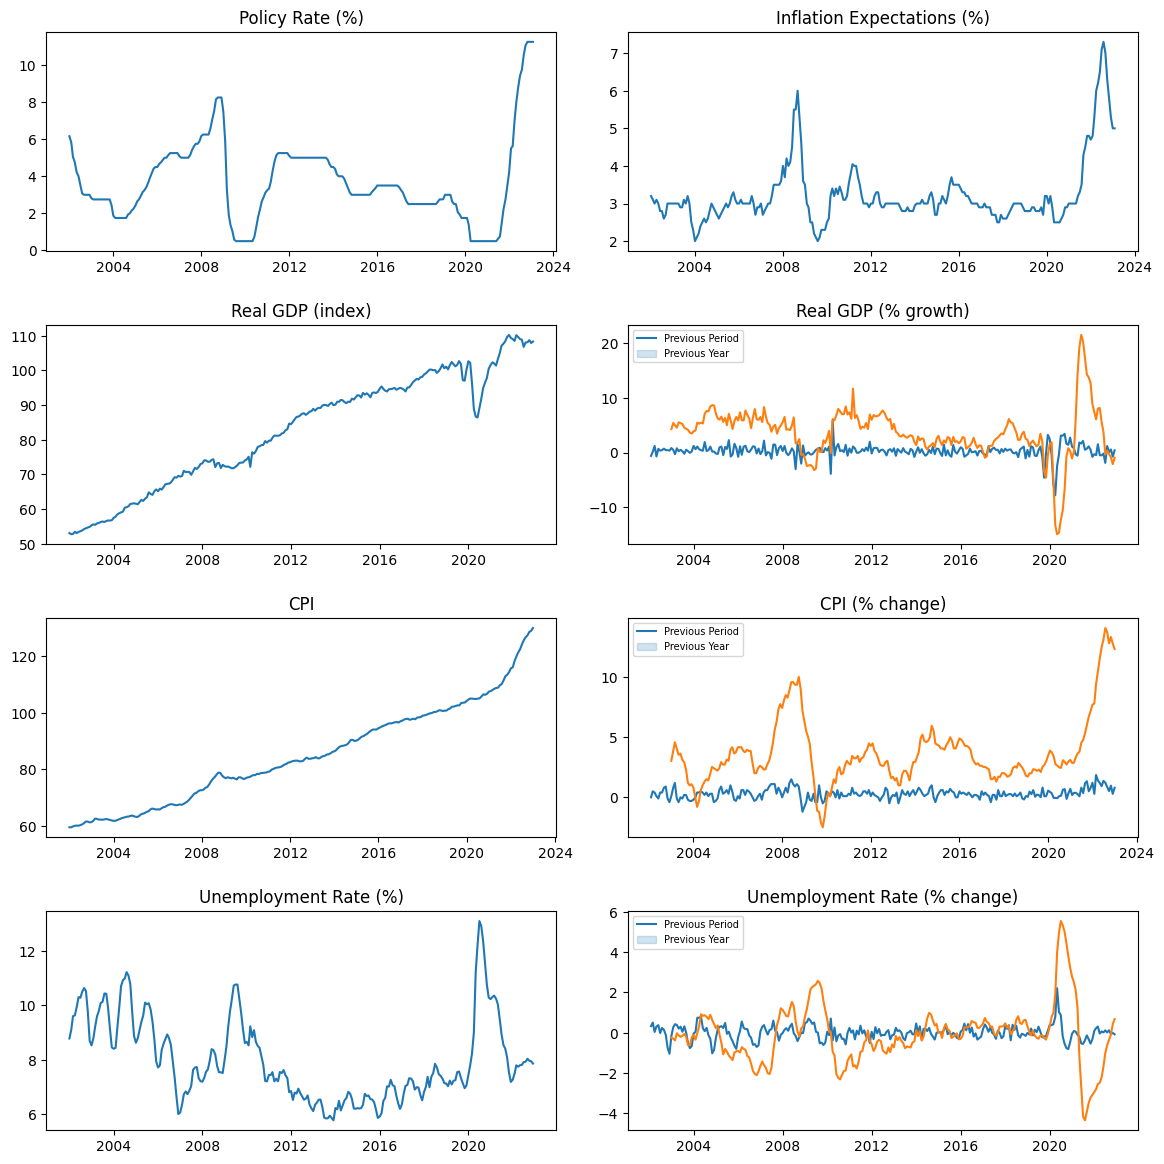

In [21]:
fig, axes = plt.subplots(4,2,figsize=(12,12))
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['rate'].values, ax=axes[0][0])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['infl_exp'].values, ax=axes[0][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['gdp'].values, ax=axes[1][0])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['gdp_diff_prev'].values, ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['gdp_diff_year'].values, ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['cpi'].values, ax=axes[2][0])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['cpi_diff_prev'].values, ax=axes[2][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['cpi_diff_year'].values, ax=axes[2][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['unem'].values, ax=axes[3][0])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['unem_diff_prev'].values, ax=axes[3][1])
sns.lineplot(x=df_nontext_raw_chile.index, y=df_nontext_raw_chile['unem_diff_year'].values, ax=axes[3][1])

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].set_xlabel("")
        if (i > 0) and (j == 1):
            axes[i][j].legend(loc='upper left', fontsize='7', labels=['Previous Period', 'Previous Year'])

axes[0][0].set_title('Policy Rate (%)')
axes[0][1].set_title('Inflation Expectations (%)')
axes[1][0].set_title('Real GDP (index)')
axes[1][1].set_title('Real GDP (% growth)')
axes[2][0].set_title('CPI')
axes[2][1].set_title('CPI (% change)')
axes[3][0].set_title('Unemployment Rate (%)')
axes[3][1].set_title('Unemployment Rate (% change)')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.tight_layout(pad=2.0)
plt.show()


#### Correlation analysis

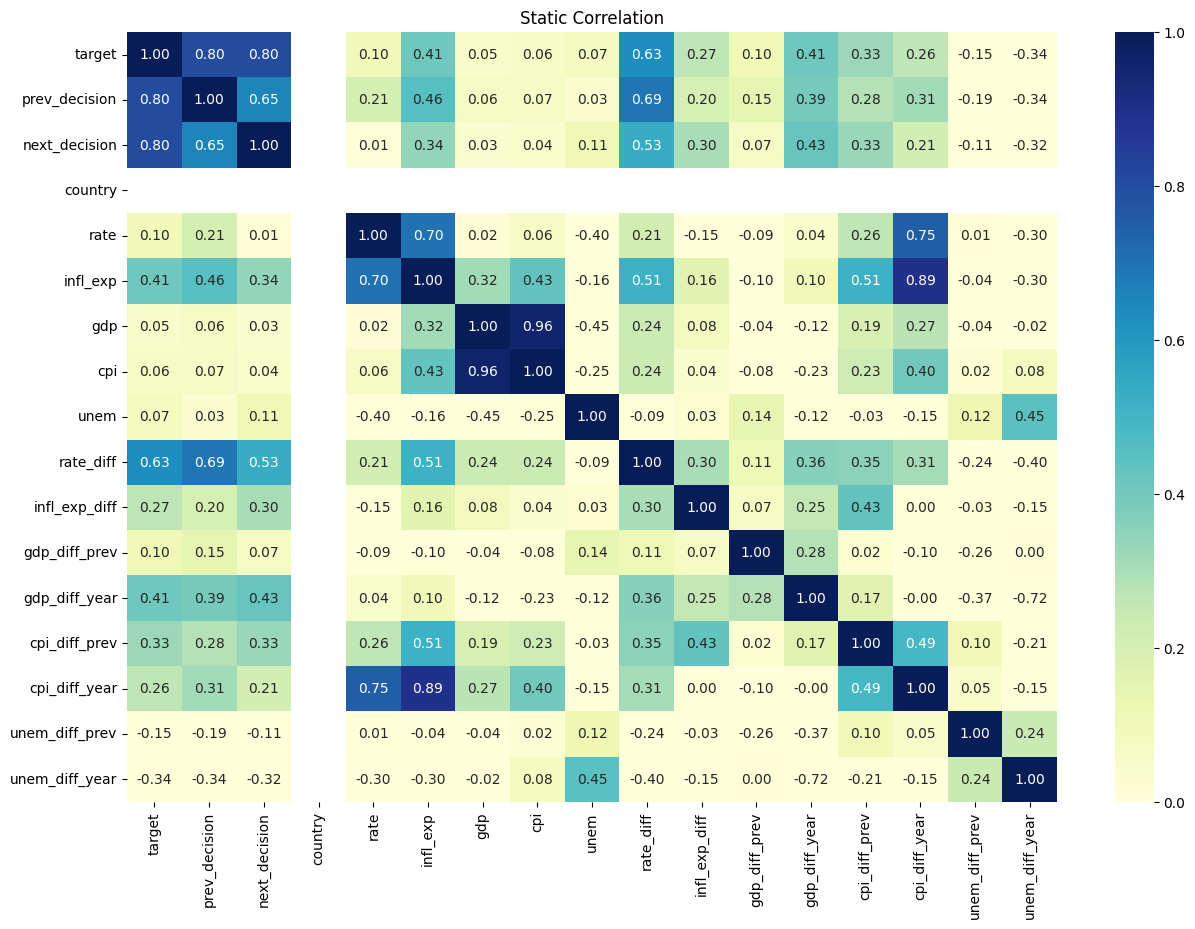

In [22]:
#df_nontext_raw_peru = df_nontext_raw_peru.drop('country')
#df_nontext_raw_chile=df_nontext_raw_chile.drop(['country'], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df_nontext_raw_chile[df_nontext_raw_chile.columns.values].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Static Correlation")
plt.show()

Higher correlation with the target (Rate Decision):

+ 'rate_diff'
+ 'prev_decision'
+ 'cpi_diff_year'
+ 'infl_exp'
+ 'unem_diff_year'
+ 'gdp_diff_year'

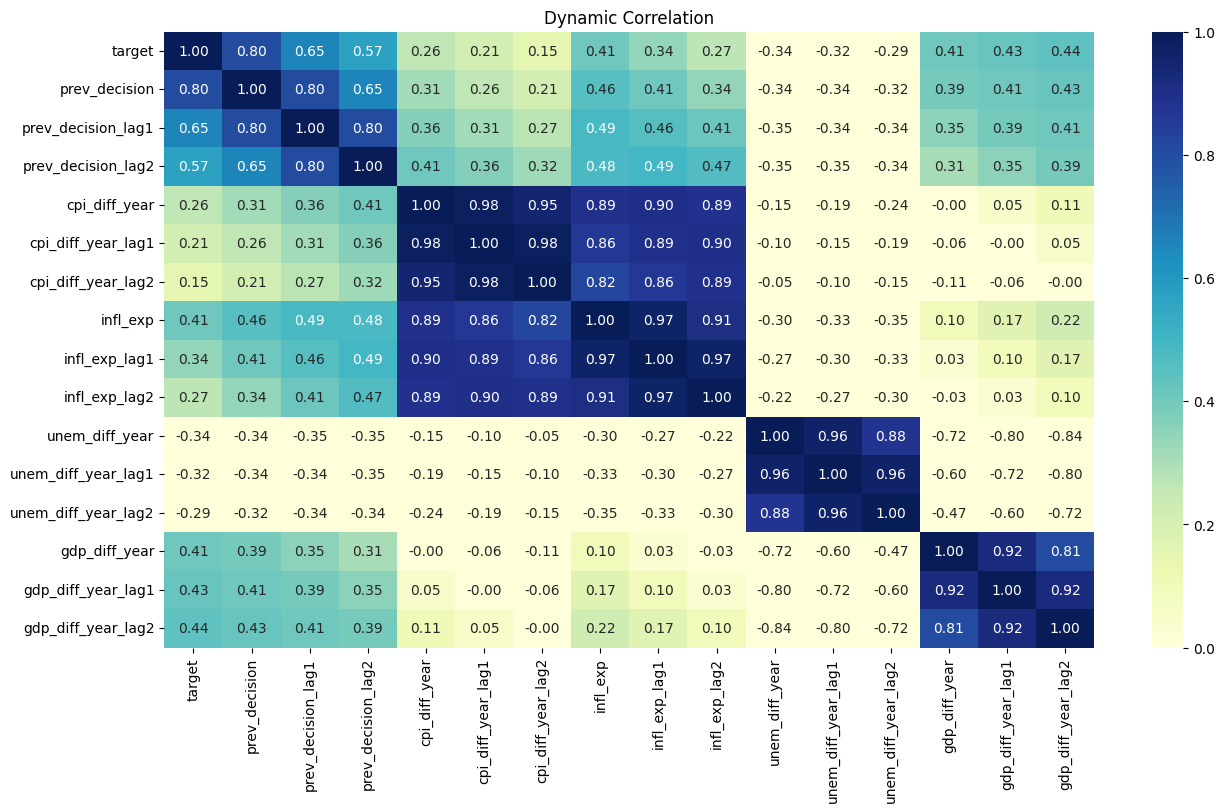

In [23]:
# Adding some lags
df_nontext_raw_chile['prev_decision_lag1'] = df_nontext_raw_chile['prev_decision'].shift(1)
df_nontext_raw_chile['prev_decision_lag2'] = df_nontext_raw_chile['prev_decision'].shift(2)
df_nontext_raw_chile['cpi_diff_year_lag1'] = df_nontext_raw_chile['cpi_diff_year'].shift(1)
df_nontext_raw_chile['cpi_diff_year_lag2'] = df_nontext_raw_chile['cpi_diff_year'].shift(2)
df_nontext_raw_chile['infl_exp_lag1'] = df_nontext_raw_chile['infl_exp'].shift(1)
df_nontext_raw_chile['infl_exp_lag2'] = df_nontext_raw_chile['infl_exp'].shift(2)
df_nontext_raw_chile['unem_diff_year_lag1'] = df_nontext_raw_chile['unem_diff_year'].shift(1)
df_nontext_raw_chile['unem_diff_year_lag2'] = df_nontext_raw_chile['unem_diff_year'].shift(2)
df_nontext_raw_chile['gdp_diff_year_lag1'] = df_nontext_raw_chile['gdp_diff_year'].shift(1)
df_nontext_raw_chile['gdp_diff_year_lag2'] = df_nontext_raw_chile['gdp_diff_year'].shift(2)

# Dynamic correlations
lag_corr_columns = ['target','prev_decision','prev_decision_lag1','prev_decision_lag2',
                    'cpi_diff_year','cpi_diff_year_lag1','cpi_diff_year_lag2',
                    'infl_exp','infl_exp_lag1','infl_exp_lag2',
                    'unem_diff_year','unem_diff_year_lag1','unem_diff_year_lag2',
                    'gdp_diff_year', 'gdp_diff_year_lag1', 'gdp_diff_year_lag2']
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.heatmap(df_nontext_raw_chile[df_nontext_raw_chile[lag_corr_columns].columns.values].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Dynamic Correlation")
plt.show()

Improvements:

+ 'prev_decision_lag1'
+ 'unem_diff_year_lag2'

In [24]:
# Keep main variables

selected_features= ['rate','target', 'prev_decision','next_decision','cpi_diff_year','infl_exp','unem_diff_year','gdp_diff_year','country']
df_nontext_chile = df_nontext_raw_chile[selected_features]
df_nontext_chile.dropna(inplace=True)
df_nontext_chile

/tmp/ipykernel_795/1832332375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_chile.dropna(inplace=True)


rate  target  prev_decision  next_decision  cpi_diff_year  \
date                                                                         
2003-01-01   2.818182    -1.0           -1.0            0.0       3.033243   
2003-02-01   2.750000     0.0           -1.0            0.0       3.857509   
2003-03-01   2.750000     0.0            0.0            0.0       4.580894   
2003-04-01   2.750000     0.0            0.0            0.0       4.060073   
2003-05-01   2.750000     0.0            0.0            0.0       3.540293   
...               ...     ...            ...            ...            ...   
2022-08-01   9.750000     1.0            1.0            1.0      14.089877   
2022-09-01  10.550000     1.0            1.0            1.0      13.728129   
2022-10-01  11.065789     1.0            1.0            0.0      12.812113   
2022-11-01  11.250000     0.0            1.0            0.0      13.338032   
2022-12-01  11.250000     0.0            0.0            0.0      12.789580   

            infl_exp  unem_diff_year  gdp_diff_year  country  
date                                                          
2003-01-01       3.0       -0.254760       4.249593        2  
2003-02-01       3.0       -0.306373       5.392514        2  
2003-03-01       3.0       -0.388684       4.947546        2  
2003-04-01       3.0       -0.037171       4.511803        2  
2003-05-01       2.9       -0.138289       5.512480        2  
...              ...             ...            ...      ...  
2022-08-01       7.3       -0.618166       0.342097        2  
2022-09-01       7.0       -0.365587      -0.299000        2  
2022-10-01       6.3       -0.108220      -0.849171        2  
2022-11-01       5.8        0.421174      -2.118585        2  
2022-12-01       5.3        0.672855      -0.951262        2  

[240 rows x 9 columns]

In [25]:
#df_nontext_chile.to_csv(data_path+'/nontext_data_chile_final.csv',index_label=False)

### Australia

#### Add decisions

In [26]:
df_nontext_raw_aus['target'] = np.NaN

for i in range(len(df_nontext_raw_aus)):
    if df_nontext_raw_aus['rate'][i] != np.NaN:
        try:
            rate_diff = df_nontext_raw_aus['rate'][i+1] - df_nontext_raw_aus['rate'][i]
            if rate_diff > 0:
                df_nontext_raw_aus['target'][i] = 1
            elif rate_diff == 0:
                df_nontext_raw_aus['target'][i] = 0
            elif rate_diff < 0:
                df_nontext_raw_aus['target'][i] = -1
            #else:
            #    df_nontext_raw_aus['target'][i] = 0
        except Exception:
            df_nontext_raw_aus['target'][i] = np.NaN
    else:
        df_nontext_raw_aus['target'][i] = np.NaN

df_nontext_raw_aus.head(12)

/tmp/ipykernel_795/63651131.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_aus['target'][i] = 0
/tmp/ipykernel_795/63651131.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_aus['target'][i] = 1
/tmp/ipykernel_795/63651131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_raw_aus['target'][i] = -1
/tmp/ipykernel_795/63651131.py:16: SettingWithCopyWarning: 
A value is trying to be set 

rate  infl_exp    gdp_index  gdp_growth        cpi  cpi_nfe_perc  \
date                                                                           
2008-01-01  7.00  2.850000  378522.0000         NaN  83.956350      0.818527   
2008-02-01  7.00  2.850000  378886.6667    0.001927  84.327838      1.022757   
2008-03-01  7.25  2.850000  379251.3333    0.001925  84.699327      1.226987   
2008-04-01  7.25  2.850000  379616.0000    0.003374  85.070815      1.431217   
2008-05-01  7.25  2.983333  380531.0000    0.004821  85.380389      1.282350   
2008-06-01  7.25  3.116667  381446.0000    0.004809  85.689962      1.133483   
2008-07-01  7.25  3.250000  382361.0000    0.000828  85.999536      0.984616   
2008-08-01  7.25  3.333333  381762.0000   -0.003133  85.999536      0.788039   
2008-09-01  7.00  3.416667  381163.0000   -0.003138  85.999536      0.591463   
2008-10-01  6.00  3.500000  380564.0000    0.001499  85.999536      0.394886   
2008-11-01  5.25  3.550000  381734.3333    0.006151  85.968578      0.296880   
2008-12-01  4.25  3.600000  382904.6667    0.006132  85.937621      0.198875   

                unem        gdp  country  target  
date                                              
2008-01-01  4.220095  50.000000        3     0.0  
2008-02-01  3.979727  50.048170        3     1.0  
2008-03-01  4.056833  50.096340        3     0.0  
2008-04-01  4.265198  50.144509        3     0.0  
2008-05-01  4.265345  50.265374        3     0.0  
2008-06-01  4.243306  50.386239        3     0.0  
2008-07-01  4.249669  50.507104        3     0.0  
2008-08-01  4.015570  50.427980        3    -1.0  
2008-09-01  4.288568  50.348857        3    -1.0  
2008-10-01  4.289863  50.269733        3    -1.0  
2008-11-01  4.462586  50.424326        3    -1.0  
2008-12-01  4.569731  50.578918        3    -1.0

In [27]:
# Add difference from previous value
df_nontext_raw_aus['prev_decision'] = df_nontext_raw_aus['target'].shift(1)
df_nontext_raw_aus['next_decision'] = df_nontext_raw_aus['target'].shift(-1)
df_nontext_raw_aus['rate_diff'] = df_nontext_raw_aus['rate'].diff()
df_nontext_raw_aus['infl_exp_diff'] = df_nontext_raw_aus['infl_exp'].diff()
df_nontext_raw_aus['gdp_diff_prev'] = df_nontext_raw_aus['gdp'].diff() / df_nontext_raw_aus['gdp'].shift(1) * 100
df_nontext_raw_aus['gdp_diff_year'] = df_nontext_raw_aus['gdp'].diff(periods=12) / df_nontext_raw_aus['gdp'].shift(12) * 100
df_nontext_raw_aus['cpi_diff_prev'] = df_nontext_raw_aus['cpi'].diff() / df_nontext_raw_aus['cpi'].shift(1) * 100
df_nontext_raw_aus['cpi_diff_year'] = df_nontext_raw_aus['cpi'].diff(periods=12) / df_nontext_raw_aus['cpi'].shift(12) * 100
#df_nontext_raw_aus['cpi_nfe_diff_prev'] = df_nontext_raw_aus['cpi_nfe'].diff() / df_nontext_raw_aus['cpi_nfe'].shift(1) * 100
#df_nontext_raw_aus['cpi_nfe_diff_year'] = df_nontext_raw_aus['cpi_nfe'].diff(periods=12) / df_nontext_raw_aus['cpi_nfe'].shift(12) * 100
df_nontext_raw_aus['unem_diff_prev'] = df_nontext_raw_aus['unem'].diff()
df_nontext_raw_aus['unem_diff_year'] = df_nontext_raw_aus['unem'].diff(periods=12)

# Move columns to front of df
cols_to_move = ['target', 'prev_decision','next_decision','country']
df_nontext_raw_aus = df_nontext_raw_aus[ cols_to_move + [col for col in df_nontext_raw_aus.columns if col not in cols_to_move]]
df_nontext_raw_aus

target  prev_decision  next_decision  country   rate  infl_exp  \
date                                                                         
2008-01-01     0.0            NaN            1.0        3  7.000  2.850000   
2008-02-01     1.0            0.0            0.0        3  7.000  2.850000   
2008-03-01     0.0            1.0            0.0        3  7.250  2.850000   
2008-04-01     0.0            0.0            0.0        3  7.250  2.850000   
2008-05-01     0.0            0.0            0.0        3  7.250  2.983333   
...            ...            ...            ...      ...    ...       ...   
2022-10-01     1.0            1.0            1.0        3  2.600  4.800000   
2022-11-01     1.0            1.0            1.0        3  2.850  5.044444   
2022-12-01     1.0            1.0            1.0        3  3.100  5.288889   
2023-01-01     1.0            1.0            NaN        3  3.225       NaN   
2023-02-01     NaN            1.0            NaN        3  3.350       NaN   

              gdp_index  gdp_growth         cpi  cpi_nfe_perc      unem  \
date                                                                      
2008-01-01  378522.0000         NaN   83.956350      0.818527  4.220095   
2008-02-01  378886.6667    0.001927   84.327838      1.022757  3.979727   
2008-03-01  379251.3333    0.001925   84.699327      1.226987  4.056833   
2008-04-01  379616.0000    0.003374   85.070815      1.431217  4.265198   
2008-05-01  380531.0000    0.004821   85.380389      1.282350  4.265345   
...                 ...         ...         ...           ...       ...   
2022-10-01  540383.1629    0.004232  121.476666      1.928516  3.413771   
2022-11-01          NaN    0.004223   80.984444      1.285677  3.465082   
2022-12-01          NaN    0.004214   40.492222      0.642839  3.508096   
2023-01-01          NaN    0.004205         NaN           NaN       NaN   
2023-02-01          NaN    0.004196         NaN           NaN       NaN   

                  gdp  rate_diff  infl_exp_diff  gdp_diff_prev  gdp_diff_year  \
date                                                                            
2008-01-01  50.000000        NaN            NaN            NaN            NaN   
2008-02-01  50.048170      0.000       0.000000       0.096340            NaN   
2008-03-01  50.096340      0.250       0.000000       0.096247            NaN   
2008-04-01  50.144509      0.000       0.000000       0.096154            NaN   
2008-05-01  50.265374      0.000       0.133333       0.241033            NaN   
...               ...        ...            ...            ...            ...   
2022-10-01  71.380681      0.250       0.366667       0.211608        2.99997   
2022-11-01        NaN      0.250       0.244444            NaN            NaN   
2022-12-01        NaN      0.250       0.244444            NaN            NaN   
2023-01-01        NaN      0.125            NaN            NaN            NaN   
2023-02-01        NaN      0.125            NaN            NaN            NaN   

            cpi_diff_prev  cpi_diff_year  unem_diff_prev  unem_diff_year  
date                                                                      
2008-01-01            NaN            NaN             NaN             NaN  
2008-02-01       0.442478            NaN       -0.240368             NaN  
2008-03-01       0.440529            NaN        0.077106             NaN  
2008-04-01       0.438596            NaN        0.208365             NaN  
2008-05-01       0.363901            NaN        0.000147             NaN  
...                   ...            ...             ...             ...  
2022-10-01       0.589592       7.831822       -0.147720       -1.831100  
2022-11-01     -33.333333     -28.622101        0.051311       -1.143782  
2022-12-01     -50.000000     -64.562449        0.043014       -0.656118  
2023-01-01            NaN            NaN             NaN             NaN  
2023-02-01            NaN            NaN             NaN           

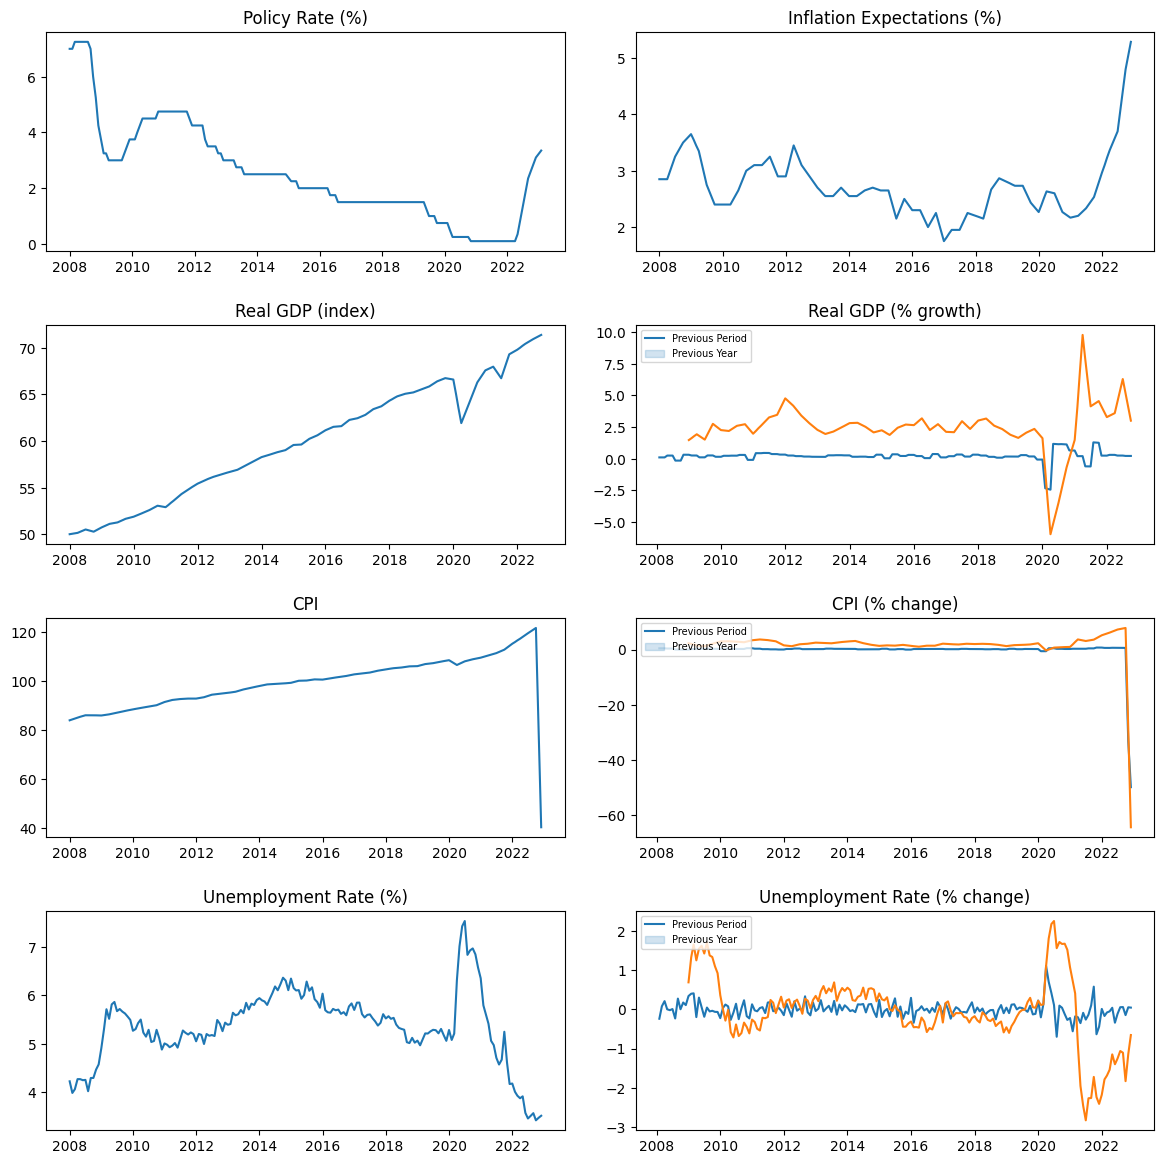

In [28]:
fig, axes = plt.subplots(4,2,figsize=(12,12))
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['rate'].values, ax=axes[0][0])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['infl_exp'].values, ax=axes[0][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['gdp'].values, ax=axes[1][0])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['gdp_diff_prev'].values, ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['gdp_diff_year'].values, ax=axes[1][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['cpi'].values, ax=axes[2][0])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['cpi_diff_prev'].values, ax=axes[2][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['cpi_diff_year'].values, ax=axes[2][1])
#sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['cpi_nfe'].values, ax=axes[3][0])
#sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['cpi_nfe_diff_prev'].values, ax=axes[3][1])
#sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['cpi_nfe_diff_year'].values, ax=axes[3][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['unem'].values, ax=axes[3][0])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['unem_diff_prev'].values, ax=axes[3][1])
sns.lineplot(x=df_nontext_raw_aus.index, y=df_nontext_raw_aus['unem_diff_year'].values, ax=axes[3][1])

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].set_xlabel("")
        if (i > 0) and (j == 1):
            axes[i][j].legend(loc='upper left', fontsize='7', labels=['Previous Period', 'Previous Year'])

axes[0][0].set_title('Policy Rate (%)')
axes[0][1].set_title('Inflation Expectations (%)')
axes[1][0].set_title('Real GDP (index)')
axes[1][1].set_title('Real GDP (% growth)')
axes[2][0].set_title('CPI')
axes[2][1].set_title('CPI (% change)')
#axes[3][0].set_title('CPI without food/energy')
#axes[3][1].set_title('CPI without food/energy (% change)')
axes[3][0].set_title('Unemployment Rate (%)')
axes[3][1].set_title('Unemployment Rate (% change)')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))
plt.tight_layout(pad=2.0)
plt.show()


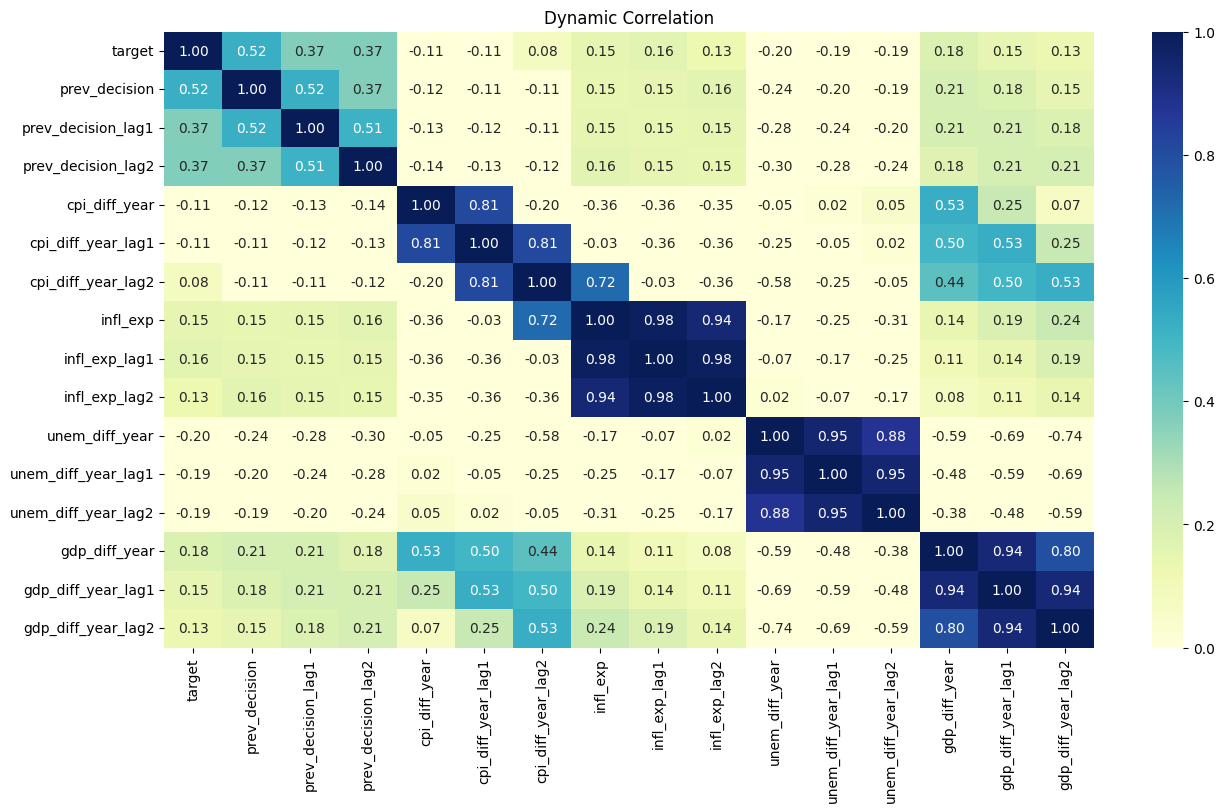

In [29]:
# Adding some lags
df_nontext_raw_aus['prev_decision_lag1'] = df_nontext_raw_aus['prev_decision'].shift(1)
df_nontext_raw_aus['prev_decision_lag2'] = df_nontext_raw_aus['prev_decision'].shift(2)
df_nontext_raw_aus['cpi_diff_year_lag1'] = df_nontext_raw_aus['cpi_diff_year'].shift(1)
df_nontext_raw_aus['cpi_diff_year_lag2'] = df_nontext_raw_aus['cpi_diff_year'].shift(2)
df_nontext_raw_aus['infl_exp_lag1'] = df_nontext_raw_aus['infl_exp'].shift(1)
df_nontext_raw_aus['infl_exp_lag2'] = df_nontext_raw_aus['infl_exp'].shift(2)
df_nontext_raw_aus['unem_diff_year_lag1'] = df_nontext_raw_aus['unem_diff_year'].shift(1)
df_nontext_raw_aus['unem_diff_year_lag2'] = df_nontext_raw_aus['unem_diff_year'].shift(2)
df_nontext_raw_aus['gdp_diff_year_lag1'] = df_nontext_raw_aus['gdp_diff_year'].shift(1)
df_nontext_raw_aus['gdp_diff_year_lag2'] = df_nontext_raw_aus['gdp_diff_year'].shift(2)

# Dynamic correlations
lag_corr_columns = ['target','prev_decision','prev_decision_lag1','prev_decision_lag2',
                    'cpi_diff_year','cpi_diff_year_lag1','cpi_diff_year_lag2',
                    'infl_exp','infl_exp_lag1','infl_exp_lag2',
                    'unem_diff_year','unem_diff_year_lag1','unem_diff_year_lag2',
                    'gdp_diff_year', 'gdp_diff_year_lag1', 'gdp_diff_year_lag2']
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

sns.heatmap(df_nontext_raw_aus[df_nontext_raw_aus[lag_corr_columns].columns.values].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Dynamic Correlation")
plt.show()

#### Correlation

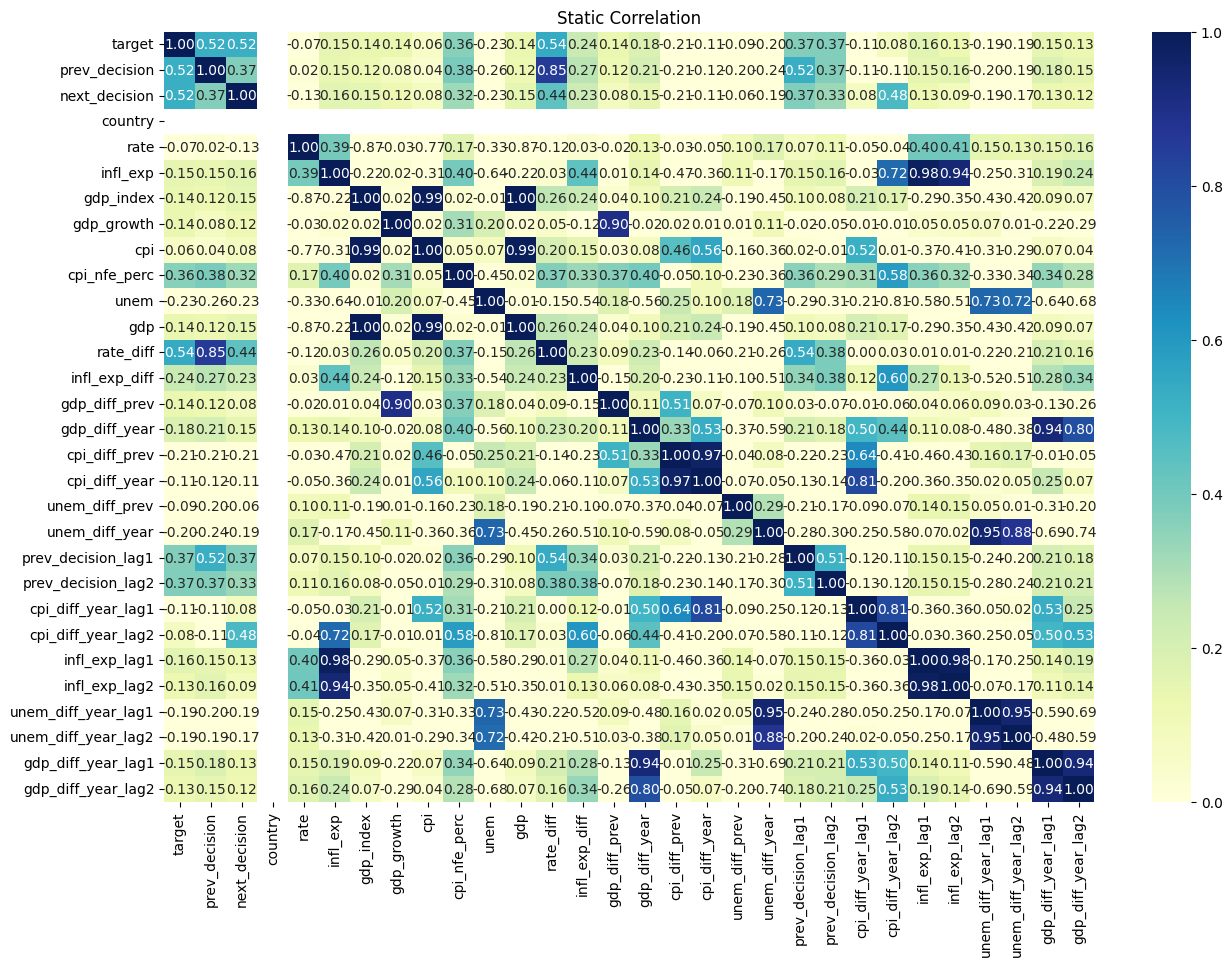

In [30]:
#df_nontext_raw_aus=df_nontext_raw_aus.drop(['country'], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(df_nontext_raw_aus[df_nontext_raw_aus.columns.values].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=ax)
ax.set_title("Static Correlation")
plt.show()

In [31]:
# Keep main variables
selected_features = ['rate','target','prev_decision','next_decision','cpi_diff_year','infl_exp','unem_diff_year','gdp_diff_year','country']
df_nontext_aus = df_nontext_raw_aus[selected_features]
df_nontext_aus.dropna(inplace=True)
df_nontext_aus

/tmp/ipykernel_795/4279257493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nontext_aus.dropna(inplace=True)


rate  target  prev_decision  next_decision  cpi_diff_year  \
date                                                                    
2009-01-01  3.75    -1.0           -1.0            0.0       2.323009   
2009-02-01  3.25     0.0           -1.0           -1.0       2.055800   
2009-03-01  3.25    -1.0            0.0            0.0       1.790936   
2009-04-01  3.00     0.0           -1.0            0.0       1.528384   
2009-05-01  3.00     0.0            0.0            0.0       1.414068   
...          ...     ...            ...            ...            ...   
2022-06-01  0.85     1.0            1.0            1.0       6.891741   
2022-07-01  1.35     1.0            1.0            1.0       7.262104   
2022-08-01  1.85     1.0            1.0            1.0       7.453588   
2022-09-01  2.35     1.0            1.0            1.0       7.643488   
2022-10-01  2.60     1.0            1.0            1.0       7.831822   

            infl_exp  unem_diff_year  gdp_diff_year  country  
date                                                          
2009-01-01  3.650000        0.687076       1.467022        3  
2009-02-01  3.550000        1.324423       1.620009        3  
2009-03-01  3.450000        1.653953       1.772703        3  
2009-04-01  3.350000        1.247053       1.925103        3  
2009-05-01  3.150000        1.545398       1.783298        3  
...              ...             ...            ...      ...  
2022-06-01  3.588889       -1.400413       5.381488        3  
2022-07-01  3.700000       -1.253843       6.291443        3  
2022-08-01  4.066667       -1.062879       5.166457        3  
2022-09-01  4.433333       -1.106408       4.069648        3  
2022-10-01  4.800000       -1.831100       2.999970        3  

[166 rows x 9 columns]

In [32]:
#df_nontext_aus.to_csv(data_path+'/nontext_data_aus_final.csv',index_label=False)

### Merge dataframe

In [33]:
#Merge data frame 
df_nontext = pd.concat([df_nontext_peru,df_nontext_chile,df_nontext_aus])
df_nontext = df_nontext.sort_index()
df_nontext

rate  target  prev_decision  next_decision  cpi_diff_year  \
date                                                                         
2003-01-01   2.818182    -1.0           -1.0            0.0       3.033243   
2003-02-01   2.750000     0.0           -1.0            0.0       3.857509   
2003-03-01   2.750000     0.0            0.0            0.0       4.580894   
2003-04-01   2.750000     0.0            0.0            0.0       4.060073   
2003-05-01   2.750000     0.0            0.0            0.0       3.540293   
...               ...     ...            ...            ...            ...   
2022-10-01  11.065789     1.0            1.0            0.0      12.812113   
2022-11-01   7.250000     1.0            1.0            1.0       8.447230   
2022-11-01  11.250000     0.0            1.0            0.0      13.338032   
2022-12-01   7.500000     1.0            1.0            0.0       8.459162   
2022-12-01  11.250000     0.0            0.0            0.0      12.789580   

            infl_exp  unem_diff_year  gdp_diff_year  country  
date                                                          
2003-01-01       3.0       -0.254760       4.249593        2  
2003-02-01       3.0       -0.306373       5.392514        2  
2003-03-01       3.0       -0.388684       4.947546        2  
2003-04-01       3.0       -0.037171       4.511803        2  
2003-05-01       2.9       -0.138289       5.512480        2  
...              ...             ...            ...      ...  
2022-10-01       6.3       -0.108220      -0.849171        2  
2022-11-01       4.4       -1.542219       1.861062        1  
2022-11-01       5.8        0.421174      -2.118585        2  
2022-12-01       4.4       -0.759638       1.203029        1  
2022-12-01       5.3        0.672855      -0.951262        2  

[634 rows x 9 columns]

## Modeling and Training


### Briefly check how different classifiers perform

In [34]:
import seaborn as sns; sns.set()
plt.style.use('ggplot')
# Set Seaborn Style
sns.set(style='white', context='notebook', palette='deep')

from collections import defaultdict
from collections import Counter
import datetime as dt
from tqdm.notebook import tqdm
import random

In [35]:
# Import Scikit-learn models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, learning_curve, RandomizedSearchCV

import scikitplot as skplt

In [36]:
# Set Random Seed
random.seed(123)
np.random.seed(123)
rand_seed = 123

In [37]:
# Make categorical variable and split
def convert_class(x):
    if x == 1:
        return 3
    elif x == 0:
        return 2
    elif x == -1:
        return 1

y = df_nontext['target'].map(convert_class)
X = df_nontext.drop(columns=['target','next_decision','rate'])

# Because the prediction should be on the latest and should not look back, use shuffle=False
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X.values, y.values, test_size=0.2, shuffle=False)

print("Training Data: Total {}, {}".format(len(Y_train), Counter(Y_train)))
print("Test Data: Total {}, {}".format(len(Y_test), Counter(Y_test)))

Training Data: Total 507, Counter({2: 347, 3: 93, 1: 67})
Test Data: Total 127, Counter({2: 70, 3: 42, 1: 15})


In [38]:
# Use Stratified KFold Cross Validation
n_fold = 10
kfold = StratifiedKFold(n_splits=n_fold)
kfold

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [39]:
# Roughly check base classifiers without hyperparameter setting

random_state = 2
classifiers = []
#classifiers.append(("LogisticRegression", LogisticRegression(random_state = random_state)))
classifiers.append(("DecisionTree", DecisionTreeClassifier(random_state=random_state)))
classifiers.append(("AdaBoost", AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1)))
classifiers.append(("GradientBoosting", GradientBoostingClassifier(random_state=random_state)))
classifiers.append(("KNeighboors", KNeighborsClassifier(n_neighbors=3)))
classifiers.append(("RandomForest", RandomForestClassifier(random_state=random_state, n_estimators=100)))
classifiers.append(("SVC", SVC(random_state=random_state)))

cv_results = []
classifier_name = []
for classifier in classifiers :
    cv_results.append(cross_validate(classifier[1], X_train, y = Y_train, scoring = ["accuracy", "f1_macro"], cv = kfold, n_jobs=-1))
    classifier_name.append(classifier[0])

cv_acc_means = []
cv_acc_std = []
cv_f1_means = []
cv_f1_std = []
for cv_result in cv_results:
    cv_acc_means.append(cv_result['test_accuracy'].mean())
    cv_acc_std.append(cv_result['test_accuracy'].std())
    cv_f1_means.append(cv_result['test_f1_macro'].mean())
    cv_f1_std.append(cv_result['test_f1_macro'].std())

cv_res = pd.DataFrame({"Algorithm": classifier_name,
                       "CVAccMeans":cv_acc_means,
                       "CVAccErrors": cv_acc_std,
                       "CVf1Means":cv_f1_means,
                       "CVf1Errors": cv_f1_std})

In [40]:
cv_res.sort_values(by='CVAccMeans', ascending=False)

Algorithm  CVAccMeans  CVAccErrors  CVf1Means  CVf1Errors
5               SVC    0.745882     0.074466   0.528502    0.160558
4      RandomForest    0.704588     0.128259   0.553282    0.161322
2  GradientBoosting    0.700510     0.120171   0.567716    0.147337
3       KNeighboors    0.661412     0.121201   0.512786    0.144671
1          AdaBoost    0.651098     0.100327   0.522479    0.123097
0      DecisionTree    0.637255     0.094834   0.494463    0.135464

Text(0.5, 1.0, 'Cross validation scores')

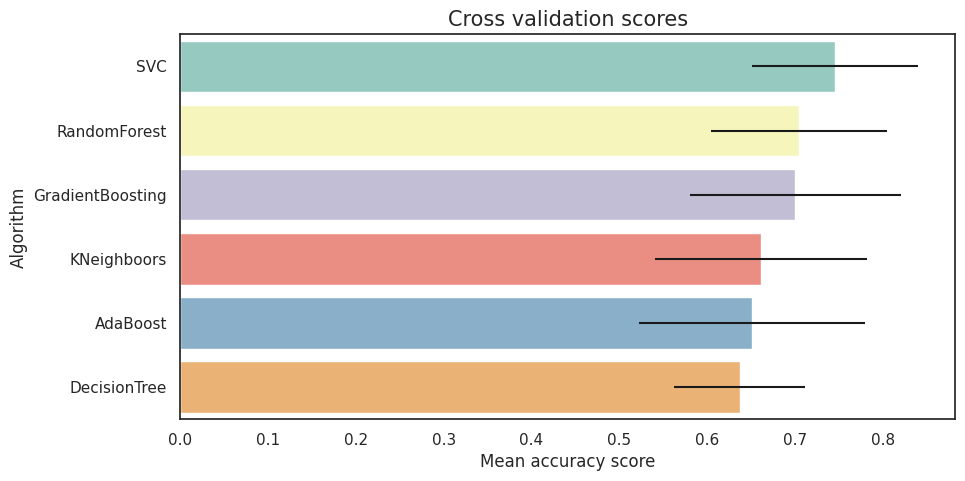

In [41]:
plt.figure(figsize=(10, 5))
ax1 = sns.barplot(data=cv_res.sort_values(by="CVAccMeans", ascending=False), x="CVAccMeans", y="Algorithm", palette="Set3", **{'xerr':cv_acc_std})
ax1.set_xlabel("Mean accuracy score", size=12)
ax1.set_title("Cross validation scores", size=15)

### Hyperparameter Tuning

In [42]:
# Define metrics
# Here, use F1 Macro to evaluate the model.
def metric(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    return acc, f1

scoring = {'Accuracy': 'accuracy', 'F1': 'f1_macro'}
refit = 'F1'

In [43]:
def train_grid_search(estimator, param_grid, scoring, refit, cv=5, verbose=1, plot=True):
    model = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=verbose, 
                         refit=refit, n_jobs=-1, return_train_score=True)
    model.fit(X_train, Y_train)
    
    results = model.cv_results_
    best_estimator = model.best_estimator_
    train_scores = results['mean_train_' + refit]
    test_scores = results['mean_test_' + refit]
    train_time = results['mean_fit_time']
    
    print("Best Score: ", model.best_score_)
    print("Best Param: ", model.best_params_)
    
    pred_train = best_estimator.predict(X_train)
    pred_test = best_estimator.predict(X_test)

    acc, f1 = metric(Y_train, pred_train)
    acc, f1 = metric(Y_test, pred_test)

    if plot:
        ### Confusion Matrix ###
        class_names = ['Lower', 'Hold', 'Raise']
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Confusion Matrix", fontsize=20)
        
        plot_confusion_matrix(best_estimator, X_train, Y_train, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize=None, ax=ax1)
        ax1.set_title("Train Data: Actual Count")
        ax1.grid(False)
        
        plot_confusion_matrix(best_estimator, X_train, Y_train, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize='all', ax=ax2)
        ax2.set_title=("Train Data: Normalized")
        ax2.grid(False)
        
        plot_confusion_matrix(best_estimator, X_test, Y_test, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize=None, ax=ax3)
        ax3.set_title=("Test Data: Actual Count")
        ax3.grid(False)
        
        plot_confusion_matrix(best_estimator, X_test, Y_test, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize='all', ax=ax4)
        ax4.set_title("Test Data: Normalized")
        ax4.grid(False)
        
        plt.tight_layout(pad=3.0)
        plt.show()

    return model

#### Random Forest

In [44]:
# Random Forest
rf_clf = RandomForestClassifier()

# Perform Grid Search
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto'],
              'max_depth': [2, 4, 6, 8],
              'criterion': ['gini'],
              'bootstrap': [False]}

rf_model = train_grid_search(rf_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
rf_best = rf_model.best_estimator_

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits


/home/vl/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/vl/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/vl/.venv/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

KeyboardInterrupt: 

In [ ]:
# # Random Forest
# rf_clf = RandomForestClassifier()

# # Perform Random Hyperparamter Grid Search
# rand_param_grid = {"max_depth": [None],
#               "max_features": [1, 2, 3, 5],
#               "min_samples_split": [2, 3, 5, 7, 10],
#               "min_samples_leaf": [1, 3, 5, 7, 10, 15],
#               "bootstrap": [False],
#               "n_estimators" :[1, 2, 5, 10, 100, 200, 300, 500, 1000],
#               "criterion": ["gini"]}

# rand_model = RandomizedSearchCV(estimator=rf_clf, param_distributions=rand_param_grid, 
#                                  n_iter=300, cv=kfold, scoring=scoring[refit], verbose=1, 
#                                  random_state=rand_seed, n_jobs=-1)
# rand_model.fit(X_train,Y_train)
# print(rand_model.best_score_)
# print(rand_model.best_params_)

In [ ]:
# # Perform Grid Search
# param_grid = {'n_estimators': np.linspace(1, 500, 50, dtype=int),
#               'min_samples_split': [2],
#               'min_samples_leaf': [3],
#               'max_features': [8],
#               'max_depth': [None],
#               'criterion': ['gini'],
#               'bootstrap': [False]}

# rf_model = train_grid_search(rf_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
# rf_best = rf_model.best_estimator_

In [ ]:
# Feature importance
plt.figure(figsize=(10,7))
indices = np.argsort(rf_best.feature_importances_)[::-1][:40]
g = sns.barplot(y=X.columns[indices][:40], x=rf_best.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title('Random Forest feature importance')

### SVM

In [ ]:
# Support Vector Machine
svm_clf = SVC(probability=True)

# Perform Random Hyperparamter Grid Search
rand_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                  'C': [1, 2, 3, 5, 8, 10, 50, 100, 200, 300, 500, 1000]}

rand_model = RandomizedSearchCV(estimator=svm_clf, param_distributions=rand_param_grid, 
                                 n_iter=300, cv=kfold, scoring=scoring[refit], verbose=1, 
                                 random_state=rand_seed, n_jobs=-1)
rand_model.fit(X_train,Y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

In [ ]:
# Perform Grid Search
param_grid = {'gamma': np.linspace(0.0001, 0.1, 50, dtype=float),
              'C': [10],
              'kernel': ['rbf']}

svm_model = train_grid_search(svm_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
svm_best = svm_model.best_estimator_